## Research Topic - Predictive Modeling in Healthcare Delivery: Optimizing the Logistics Strategy for Distribution HIV/AIDS Commodities Across Africa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})
pd.set_option('display.max_columns', 50)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

### Assessing Data

In [2]:
data = pd.read_csv("Supply_Chain_Shipment_Pricing_Data.csv")

In [3]:
# Checking the feature types
print(f"This dataset contains {data.select_dtypes(include=['object']).shape[1]} categorical features and {data.select_dtypes(include=['int', 'float']).shape[1]} numerical features")

This dataset contains 25 categorical features and 7 numerical features


In [4]:
data.sample(5)

id project code       pq #    po / so #   asn/dn #        country  \
7866  83817   111-MZ-T30  FPQ-14226     SO-49390    DN-3886     Mozambique   
9073  85262   104-CI-T30   FPQ-8790     SO-41200    DN-2652  Côte d'Ivoire   
8659  84766   114-UG-T30  FPQ-10780     SO-43510    DN-2926         Uganda   
2900  16794   107-RW-T30  FPQ-13651  SCMS-227720  ASN-25267         Rwanda   
3675  30561   133-NG-T30  FPQ-12812  SCMS-210350  ASN-22882        Nigeria   

     managed by  fulfill via vendor inco term shipment mode  \
7866   PMO - US     From RDC   N/A - From RDC         Truck   
9073   PMO - US     From RDC   N/A - From RDC           Air   
8659   PMO - US     From RDC   N/A - From RDC           Air   
2900   PMO - US  Direct Drop              EXW           Air   
3675   PMO - US  Direct Drop              EXW           Air   

     pq first sent to client date po sent to vendor date  \
7866                     5/2/2014         N/A - From RDC   
9073                   11/11/2011         N/A - From RDC   
8659                   10/10/2012         N/A - From RDC   
2900                     2/5/2014              2/28/2014   
3675                    8/13/2013              11/1/2013   

     scheduled delivery date delivered to client date delivery recorded date  \
7866               30-Sep-14                30-Oct-14              13-Nov-14   
9073               30-May-12                30-May-12              30-May-12   
8659               20-Dec-12                28-Nov-12              28-Nov-12   
2900                6-May-14                 6-May-14              15-May-14   
3675               23-Dec-13                16-Dec-13              16-Dec-13   

     product group sub classification                    vendor  \
7866           ARV              Adult             SCMS from RDC   
9073           ARV              Adult             SCMS from RDC   
8659           ARV              Adult             SCMS from RDC   
2900           ARV          Pediatric  Aurobindo Pharma Limited   
3675          HRDT           HIV test             Orgenics, Ltd   

                                       item description  \
7866  Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...   
9073  Abacavir/Lamivudine 600/300mg, scored tablets,...   
8659                   Abacavir 300mg, tablets, 60 Tabs   
2900  Nevirapine 10mg/ml, oral suspension w/syringe,...   
3675     HIV 1/2, Determine Complete HIV Kit, 100 Tests   

                       molecule/test type      brand     dosage  \
7866                  Lopinavir/Ritonavir     Aluvia   200/50mg   
9073                  Abacavir/Lamivudine    Generic  600/300mg   
8659                             Abacavir    Generic      300mg   
2900                           Nevirapine    Generic    10mg/ml   
3675  HIV 1/2, Determine Complete HIV Kit  Determine        NaN   

          dosage form  unit of measure (per pack)  line item quantity  \
7866           Tablet                         120               49000   
9073     Tablet - FDC                          30                1620   
8659           Tablet                          60                2067   
2900  Oral suspension                         240                9690   
3675         Test kit                         100                9347   

      line item value  pack price  unit price              manufacturing site  \
7866        926100.00       18.90        0.16     ABBVIE Ludwigshafen Germany   
9073         36450.00       22.50        0.75  Mylan (formerly Matrix) Nashik   
8659         26788.32       12.96        0.22  Mylan (formerly Matrix) Nashik   
2900         14631.90        1.51        0.01       Aurobindo Unit III, India   
3675        831883.00       89.00        0.89         Alere Medical Co., Ltd.   

      first line designation       weight (kilograms)  \
7866                    True                    11107   
9073                   False  See DN-2652 (ID#:82477)   
8659                    True                      220   
2900

In [5]:
data.describe()

id  unit of measure (per pack)  line item quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       line item value    pack price    unit price  line item insurance (usd)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

In [6]:
data.describe(include="object")

project code            pq #    po / so #   asn/dn #       country  \
count         10324           10324        10324      10324         10324   
unique          142            1237         6233       7030            43   
top      116-ZA-T30  Pre-PQ Process  SCMS-199289  ASN-19166  South Africa   
freq            768            2681           67         54          1406   

       managed by fulfill via vendor inco term shipment mode  \
count       10324       10324            10324          9964   
unique          4           2                8             4   
top      PMO - US    From RDC   N/A - From RDC           Air   
freq        10265        5404             5404          6113   

       pq first sent to client date po sent to vendor date  \
count                         10324                  10324   
unique                          765                    897   
top                  Pre-PQ Process         N/A - From RDC   
freq                           2476                   5404   

       scheduled delivery date delivered to client date  \
count                    10324                    10324   
unique                    2006                     2093   
top                  29-Aug-14                29-Aug-14   
freq                        97                       74   

       delivery recorded date product group sub classification         vendor  \
count                   10324         10324              10324          10324   
unique                   2042             5                  6             73   
top                 29-Aug-14           ARV              Adult  SCMS from RDC   
freq                       67          8550               6595           5404   

                         item description molecule/test type    brand dosage  \
count                               10324              10324    10324   8588   
unique                                184                 86       48     54   
top     Efavirenz 600mg, tablets, 30 Tabs          Efavirenz  Generic  300mg   
freq                                  755               1125     7285    990   

       dosage form         manufacturing site          weight (kilograms)  \
count        10324                      10324                       10324   
unique          17                         88                        4688   
top         Tablet  Aurobindo Unit III, India  Weight Captured Separately   
freq          3532                       3172                        1507   

                        freight cost (usd)  
count                                10324  
unique                                6733  
top     Freight Included in Commodity Cost  
freq                                  1442

In [7]:
data['pq first sent to client date'].value_counts()

Pre-PQ Process       2476
9/11/2014             205
Date Not Captured     205
7/11/2013             173
4/30/2014             123
                     ... 
7/29/2010               1
10/3/2011               1
12/17/2013              1
2/5/2015                1
8/29/2013               1
Name: pq first sent to client date, Length: 765, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [9]:
# Checking for missing values
((data.isnull().sum() / data.shape[0]) *100).sort_values(ascending=False).head(4)

dosage                       16.815188
shipment mode                 3.487021
line item insurance (usd)     2.779930
molecule/test type            0.000000
dtype: float64

It can be observed that 3 of our features have missing values: `line item insurance (usd)`, `dosage`, and `shipment mode`, proceed to fill them

### Cleaning

In [10]:
# Formatting column name properly
data.columns = [col.replace(' ', '_') for col in data.columns]
data.rename(columns=lambda x: x.replace("(", "").replace(")", "").replace("#", ""), inplace=True)

In [11]:
data.columns

Index(['id', 'project_code', 'pq_', 'po_/_so_', 'asn/dn_', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'line_item_insurance_usd'],
      dtype='object')

In [12]:
mask = data["weight_kilograms"].str.contains("See")
mask_2 = data["weight_kilograms"] == "Weight Captured Separately" 
mask_3 = data["weight_kilograms"] == "0"
mask_4 = data["freight_cost_usd"] == "Invoiced Separately"
mask_5 = data['pq_first_sent_to_client_date'] == "Pre-PQ Process"
mask_6 = data['pq_first_sent_to_client_date'] == "Date Not Captured"
data = data[~mask & ~mask_2 & ~mask_3 & ~mask_4 & ~mask_5 & ~mask_6]
data.shape

(4782, 33)

In [13]:
data.head()

id project_code        pq_     po_/_so_    asn/dn_  country  \
18    81483   108-VN-T30  FPQ-10286  SCMS-156150  ASN-16914  Vietnam   
2682  12929   102-KE-T30   FPQ-4587   SCMS-58380   ASN-5901    Kenya   
2683  12935   108-VN-T30  FPQ-12051  SCMS-188650  ASN-23215  Vietnam   
2684  12959   110-ZM-T30  FPQ-14827  SCMS-256500  ASN-31164   Zambia   
2685  12973   106-HT-T30   FPQ-9066  SCMS-138620  ASN-14950    Haiti   

     managed_by  fulfill_via vendor_inco_term shipment_mode  \
18     PMO - US  Direct Drop              EXW           Air   
2682   PMO - US  Direct Drop              EXW           Air   
2683   PMO - US  Direct Drop              EXW           Air   
2684   PMO - US  Direct Drop              EXW           Air   
2685   PMO - US  Direct Drop              EXW           Air   

     pq_first_sent_to_client_date po_sent_to_vendor_date  \
18                      7/25/2012              8/15/2012   
2682                   11/18/2009              12/2/2009   
2683                     5/3/2013              5/15/2013   
2684                    8/19/2014              9/19/2014   
2685                     1/6/2012              2/24/2012   

     scheduled_delivery_date delivered_to_client_date delivery_recorded_date  \
18                 12-Nov-12                12-Nov-12              12-Nov-12   
2682               16-Feb-10                19-Feb-10              19-Feb-10   
2683                9-Jan-14                 9-Jan-14               9-Jan-14   
2684               12-May-15                12-May-15              14-May-15   
2685               12-Jun-12                12-Jun-12              12-Jun-12   

     product_group sub_classification  \
18             ARV              Adult   
2682          HRDT           HIV test   
2683           ARV              Adult   
2684          HRDT           HIV test   
2685           ARV          Pediatric   

                                                 vendor  \
18                                        CIPLA LIMITED   
2682                                      Orgenics, Ltd   
2683  MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...   
2684                                      Orgenics, Ltd   
2685                                      CIPLA LIMITED   

                                       item_description  \
18                   Zidovudine 300mg, tablets, 60 Tabs   
2682     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2683  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
2684     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2685  Lamivudine/Nevirapine/Stavudine 30/50/6mg, dis...   

                       molecule/test_type      brand     dosage  \
18                             Zidovudine    Generic      300mg   
2682  HIV 1/2, Determine Complete HIV Kit  Determine        NaN   
2683                Lamivudine/Zidovudine    Generic  150/300mg   
2684  HIV 1/2, Determine Complete HIV Kit  Determine        NaN   
2685      Lamivudine/Nevirapine/Stavudine    Generic  30/50/6mg   

                            dosage_form  unit_of_measure_per_pack  \
18                               Tablet                        60   
2682                           Test kit                       100   
2683                       Tablet - FDC                        60   
2684                           Test kit                       100   
2685  Chewable/dispersible tablet - FDC                        60   

      line_item_quantity  line_item_value  pack_price  unit_price  \
18                   525           3465.0        6.60        0.11   
2682                   1             80.0       80.00        0.80   
2683               11092          74871.0        6.75        0.11   
2684                6280         502400.0       80.00        0.80   
2685                 298            685.4        2.30        0.04   

                  manufacturing_site  first_line_designation weight_kilograms  \
18                 Cipla, Goa, India                    True               34   
268

In [14]:
# Rename varaible in transport mode column
data['shipment_mode'] = data['shipment_mode'].replace('Truck', 'Road (Truck)')

In [15]:
# Filling in missing values (backward fill method)
data["line_item_insurance_usd"] = data["line_item_insurance_usd"].fillna(method="bfill")
data["dosage"] = data["dosage"].fillna(method="bfill")
data["shipment_mode"] = data["shipment_mode"].fillna(method="bfill")
# ((data.isnull().sum() / data.shape[0]) *100).sort_values(ascending=False).head(3)

In [16]:
data["freight_cost_usd"] = data["freight_cost_usd"].replace("Freight Included in Commodity Cost", 0)

In [17]:
data["freight_cost_usd"] = data["freight_cost_usd"].astype("float")
data["weight_kilograms"] = data["weight_kilograms"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4782 entries, 18 to 10322
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4782 non-null   int64  
 1   project_code                  4782 non-null   object 
 2   pq_                           4782 non-null   object 
 3   po_/_so_                      4782 non-null   object 
 4   asn/dn_                       4782 non-null   object 
 5   country                       4782 non-null   object 
 6   managed_by                    4782 non-null   object 
 7   fulfill_via                   4782 non-null   object 
 8   vendor_inco_term              4782 non-null   object 
 9   shipment_mode                 4782 non-null   object 
 10  pq_first_sent_to_client_date  4782 non-null   object 
 11  po_sent_to_vendor_date        4782 non-null   object 
 12  scheduled_delivery_date       4782 non-null   object 
 13  d

### Preprocessing

In [18]:
# Convert Transaction Date and Time column to datetime data type
data["scheduled_delivery_date"] = pd.to_datetime(data["scheduled_delivery_date"])
data["delivered_to_client_date"] = pd.to_datetime(data["delivered_to_client_date"])
data["delivery_recorded_date"] = pd.to_datetime(data["delivery_recorded_date"])
data['pq_first_sent_to_client_date'] = pd.to_datetime(data['pq_first_sent_to_client_date'])
# data["po_sent_to_vendor_date"] = pd.to_datetime(data["po_sent_to_vendor_date"])

In [19]:
from dateutil.relativedelta import relativedelta
data["delivery_status"] = data["scheduled_delivery_date"] - data["delivered_to_client_date"] 
data["delivery_status"]= data["delivery_status"]/np.timedelta64(1,'D')

In [20]:
data["order_to_delivery_days"] = data["delivered_to_client_date"] - data['pq_first_sent_to_client_date'] 
data["order_to_delivery_days"] = data["order_to_delivery_days"] / np.timedelta64(1,'D')
data["order_to_delivery_days"] = np.ceil(data["order_to_delivery_days"]).astype(int)

In [21]:
data.head()

id project_code        pq_     po_/_so_    asn/dn_  country  \
18    81483   108-VN-T30  FPQ-10286  SCMS-156150  ASN-16914  Vietnam   
2682  12929   102-KE-T30   FPQ-4587   SCMS-58380   ASN-5901    Kenya   
2683  12935   108-VN-T30  FPQ-12051  SCMS-188650  ASN-23215  Vietnam   
2684  12959   110-ZM-T30  FPQ-14827  SCMS-256500  ASN-31164   Zambia   
2685  12973   106-HT-T30   FPQ-9066  SCMS-138620  ASN-14950    Haiti   

     managed_by  fulfill_via vendor_inco_term shipment_mode  \
18     PMO - US  Direct Drop              EXW           Air   
2682   PMO - US  Direct Drop              EXW           Air   
2683   PMO - US  Direct Drop              EXW           Air   
2684   PMO - US  Direct Drop              EXW           Air   
2685   PMO - US  Direct Drop              EXW           Air   

     pq_first_sent_to_client_date po_sent_to_vendor_date  \
18                     2012-07-25              8/15/2012   
2682                   2009-11-18              12/2/2009   
2683                   2013-05-03              5/15/2013   
2684                   2014-08-19              9/19/2014   
2685                   2012-01-06              2/24/2012   

     scheduled_delivery_date delivered_to_client_date delivery_recorded_date  \
18                2012-11-12               2012-11-12             2012-11-12   
2682              2010-02-16               2010-02-19             2010-02-19   
2683              2014-01-09               2014-01-09             2014-01-09   
2684              2015-05-12               2015-05-12             2015-05-14   
2685              2012-06-12               2012-06-12             2012-06-12   

     product_group sub_classification  \
18             ARV              Adult   
2682          HRDT           HIV test   
2683           ARV              Adult   
2684          HRDT           HIV test   
2685           ARV          Pediatric   

                                                 vendor  \
18                                        CIPLA LIMITED   
2682                                      Orgenics, Ltd   
2683  MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...   
2684                                      Orgenics, Ltd   
2685                                      CIPLA LIMITED   

                                       item_description  \
18                   Zidovudine 300mg, tablets, 60 Tabs   
2682     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2683  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
2684     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2685  Lamivudine/Nevirapine/Stavudine 30/50/6mg, dis...   

                       molecule/test_type      brand     dosage  \
18                             Zidovudine    Generic      300mg   
2682  HIV 1/2, Determine Complete HIV Kit  Determine  150/300mg   
2683                Lamivudine/Zidovudine    Generic  150/300mg   
2684  HIV 1/2, Determine Complete HIV Kit  Determine  30/50/6mg   
2685      Lamivudine/Nevirapine/Stavudine    Generic  30/50/6mg   

                            dosage_form  unit_of_measure_per_pack  \
18                               Tablet                        60   
2682                           Test kit                       100   
2683                       Tablet - FDC                        60   
2684                           Test kit                       100   
2685  Chewable/dispersible tablet - FDC                        60   

      line_item_quantity  line_item_value  pack_price  unit_price  \
18                   525           3465.0        6.60        0.11   
2682                   1             80.0       80.00        0.80   
2683               11092          74871.0        6.75        0.11   
2684                6280         502400.0       80.00        0.80   
2685                 298            685.4        2.30        0.04   

                  manufacturing_site  first_line_designation  \
18                 Cipla, Goa, India                    True   
2682                 Inverness Japan 

In [22]:
conditions = [
    data["delivery_status"] < 0.0,
    data["delivery_status"] == 0.0,
    data["delivery_status"] > 0.0
]

choices = ["delayed", "ontime", "early_delivery"]
data["delivery_status"] = np.select(conditions, choices, default=None)

In [23]:
round(data["delivery_status"].value_counts(normalize=True)*100,2)

ontime            51.80
early_delivery    33.04
delayed           15.16
Name: delivery_status, dtype: float64

In [24]:
# Dropping identifiers and text features)
data.drop(columns=['id', 'project_code', 'pq_', 'po_/_so_', 'asn/dn_',  'po_sent_to_vendor_date'], inplace=True)

In [25]:
# Check duplicated rows
data.duplicated().sum()

6

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.rename(columns={'country': 'country', 'managed_by': 'manager', 'fulfill_via': 'delivery_method',
                   'vendor_inco_term': 'vendor_terms', 'shipment_mode': 'transport_mode', 'pq_first_sent_to_client_date': 'order_date','scheduled_delivery_date': 'expected_date',
                   'delivered_to_client_date': 'actual_date', 'delivery_recorded_date': 'recorded_date', 'product_group': 'product_category', 
                   'sub_classification': 'product_type', 'vendor': 'supplier','item_description': 'product_feature', 
                   'molecule/test_type': 'product_name', 'brand': 'product_brand', 'dosage': 'dosage', 'dosage_form': 'dosage_form',
                   'unit_of_measure_per_pack': 'units_per_pack', 'line_item_quantity': 'total_quantity','line_item_value': 'total_value', 
                   'pack_price': 'pack_price', 'unit_price': 'unit_price', 'manufacturing_site': 'factory_location', 
                   'first_line_designation': 'priority_status','weight_kilograms': 'total_weight', 'freight_cost_usd': 'shipping_cost', 
                   'line_item_insurance_usd': 'insurance_cost', 'delivery_status': 'delivery_status'}, inplace=True
         )

In [28]:
# Grouping features into category
product_feat = ['product_category', 'product_type', 'supplier', 'product_name', 'product_feature', 'product_brand', 'dosage',
                   'dosage_form', 'units_per_pack']

qty_value_feat = ['total_quantity','total_value', 'pack_price', 'unit_price']

manufacture_designation = ['factory_location', 'first_line_designation']

logistics_feat = ['total_weight', 'shipping_cost','insurance_cost']

shipment_feat = ['manager', 'delivery_method', 'vendor_terms', 'transport_mode']

date_feat = ['expected_date', 'actual_date', 'recorded_date']

In [29]:
cat_feat = data.select_dtypes(include=['object', 'bool'])
cat_feat_unique = cat_feat.nunique()
cat_feat_unique

country              38
manager               2
delivery_method       2
vendor_terms          8
transport_mode        4
product_category      5
product_type          6
supplier             45
product_feature     138
product_name         72
product_brand        37
dosage               47
dosage_form          16
factory_location     59
priority_status       1
delivery_status       3
dtype: int64

In [30]:
num_data = data.select_dtypes(include=['float', 'int'])
num_data_unique = num_data.nunique()
num_data_unique

units_per_pack              28
total_quantity            3124
total_value               4269
pack_price                 542
unit_price                 120
total_weight              2907
shipping_cost             4005
insurance_cost            4044
order_to_delivery_days     433
dtype: int64

In [31]:
# Checking the feature types
print(f"""For this analysis there are `{data.select_dtypes(include=['object']).shape[1]}` categorical features, `{data.select_dtypes(include=['int', 'float']).shape[1]}` numerical features and `{data.select_dtypes(include=['datetime64[ns]']).shape[1]}` datetime features""")

For this analysis there are `15` categorical features, `9` numerical features and `4` datetime features


In [32]:
data.describe(include="all")

country   manager delivery_method    vendor_terms transport_mode  \
count      4776      4776            4776            4776           4776   
unique       38         2               2               8              4   
top     Nigeria  PMO - US     Direct Drop  N/A - From RDC            Air   
freq        655      4775            2479            2297           3031   
first       NaN       NaN             NaN             NaN            NaN   
last        NaN       NaN             NaN             NaN            NaN   
mean        NaN       NaN             NaN             NaN            NaN   
std         NaN       NaN             NaN             NaN            NaN   
min         NaN       NaN             NaN             NaN            NaN   
25%         NaN       NaN             NaN             NaN            NaN   
50%         NaN       NaN             NaN             NaN            NaN   
75%         NaN       NaN             NaN             NaN            NaN   
max         NaN       NaN             NaN             NaN            NaN   

                 order_date        expected_date          actual_date  \
count                  4776                 4776                 4776   
unique                  722                 1333                 1412   
top     2009-11-06 00:00:00  2010-04-19 00:00:00  2010-06-28 00:00:00   
freq                     95                   52                   54   
first   2009-01-04 00:00:00  2009-07-30 00:00:00  2009-07-09 00:00:00   
last    2015-07-01 00:00:00  2015-12-31 00:00:00  2015-08-25 00:00:00   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

              recorded_date product_category product_type       supplier  \
count                  4776             4776         4776           4776   
unique                 1363                5            6             45   
top     2010-06-28 00:00:00              ARV        Adult  SCMS from RDC   
freq                     54             3805         2931           2297   
first   2009-07-09 00:00:00              NaN          NaN            NaN   
last    2015-09-03 00:00:00              NaN          NaN            NaN   
mean                    NaN              NaN          NaN            NaN   
std                     NaN              NaN          NaN            NaN   
min                     NaN              NaN          NaN            NaN   
25%                     NaN              NaN          NaN            NaN   
50%                     NaN              NaN          NaN            NaN   
75%                     NaN              NaN          NaN            NaN   
max                     NaN              NaN          NaN            NaN   

                                       product_feature  \
count                                             4776   
unique                                             138   
top     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
freq                                               445   
first                                              NaN   
last                                               NaN   
mean                                               NaN   
std                                                NaN   
min                                                NaN   
25%                                                NaN   
50%                                                NaN   
75%                                                NaN   
max                                                NaN   

                               product_nam

In [33]:
# Dropping rows with wrong order date
mask = data['order_to_delivery_days'].isin([-180, -85, -13, -1])
data = data[~mask]
data.describe()

units_per_pack  total_quantity   total_value   pack_price   unit_price  \
count     4772.000000     4772.000000  4.772000e+03  4772.000000  4772.000000   
mean        75.470243    24595.633697  2.112934e+05    22.426999     0.676756   
std         76.396259    47402.086958  4.031189e+05    46.609899     2.756315   
min          1.000000        1.000000  0.000000e+00     0.000000     0.000000   
25%         30.000000     1208.250000  1.150415e+04     4.220000     0.090000   
50%         60.000000     5737.500000  6.530882e+04     8.530000     0.160000   
75%        100.000000    26621.750000  2.403004e+05    24.500000     0.492500   
max       1000.000000   619999.000000  5.951990e+06  1250.000000    41.680000   

        total_weight  shipping_cost  insurance_cost  order_to_delivery_days  
count    4772.000000    4772.000000     4772.000000             4772.000000  
mean     3682.942582   11822.833655      310.980346              162.274518  
std      7748.450837   16972.756893      569.659610               84.840660  
min         1.000000       0.000000        0.000000                3.000000  
25%       248.000000    2090.627500       16.607500              101.000000  
50%      1232.000000    6147.160000       95.215000              149.000000  
75%      3862.250000   15447.520000      350.442500              207.000000  
max    154780.000000  289653.200000     7005.490000              706.000000

In [34]:
data.head()

country   manager delivery_method vendor_terms transport_mode  \
18    Vietnam  PMO - US     Direct Drop          EXW            Air   
2682    Kenya  PMO - US     Direct Drop          EXW            Air   
2683  Vietnam  PMO - US     Direct Drop          EXW            Air   
2684   Zambia  PMO - US     Direct Drop          EXW            Air   
2685    Haiti  PMO - US     Direct Drop          EXW            Air   

     order_date expected_date actual_date recorded_date product_category  \
18   2012-07-25    2012-11-12  2012-11-12    2012-11-12              ARV   
2682 2009-11-18    2010-02-16  2010-02-19    2010-02-19             HRDT   
2683 2013-05-03    2014-01-09  2014-01-09    2014-01-09              ARV   
2684 2014-08-19    2015-05-12  2015-05-12    2015-05-14             HRDT   
2685 2012-01-06    2012-06-12  2012-06-12    2012-06-12              ARV   

     product_type                                           supplier  \
18          Adult                                      CIPLA LIMITED   
2682     HIV test                                      Orgenics, Ltd   
2683        Adult  MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...   
2684     HIV test                                      Orgenics, Ltd   
2685    Pediatric                                      CIPLA LIMITED   

                                        product_feature  \
18                   Zidovudine 300mg, tablets, 60 Tabs   
2682     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2683  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
2684     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2685  Lamivudine/Nevirapine/Stavudine 30/50/6mg, dis...   

                             product_name product_brand     dosage  \
18                             Zidovudine       Generic      300mg   
2682  HIV 1/2, Determine Complete HIV Kit     Determine  150/300mg   
2683                Lamivudine/Zidovudine       Generic  150/300mg   
2684  HIV 1/2, Determine Complete HIV Kit     Determine  30/50/6mg   
2685      Lamivudine/Nevirapine/Stavudine       Generic  30/50/6mg   

                            dosage_form  units_per_pack  total_quantity  \
18                               Tablet              60             525   
2682                           Test kit             100               1   
2683                       Tablet - FDC              60           11092   
2684                           Test kit             100            6280   
2685  Chewable/dispersible tablet - FDC              60             298   

      total_value  pack_price  unit_price                factory_location  \
18         3465.0        6.60        0.11               Cipla, Goa, India   
2682         80.0       80.00        0.80                 Inverness Japan   
2683      74871.0        6.75        0.11  Mylan (formerly Matrix) Nashik   
2684     502400.0       80.00        0.80         Alere Medical Co., Ltd.   
2685        685.4        2.30        0.04               Cipla, Goa, India   

      priority_status  total_weight  shipping_cost  insurance_cost  \
18               True          34.0         807.47            4.86   
2682             True        1028.0       10083.69            0.17   
2683             True         957.0        1869.41           92.62   
2684             True        2548.0       28709.52          516.47   
2685             True          21.0         304.62            0.96   

     delivery_status  order_to_delivery_days  
18            ontime                     110  
2682         delayed                      93  
2683          ontime                     251  
2684          ontime                     266  
2685          ontime                     158

In [35]:
df = data[["country", "factory_location"]]

In [36]:
# data["factory_location"].unique()

## Univariate Analysis

#### Countries

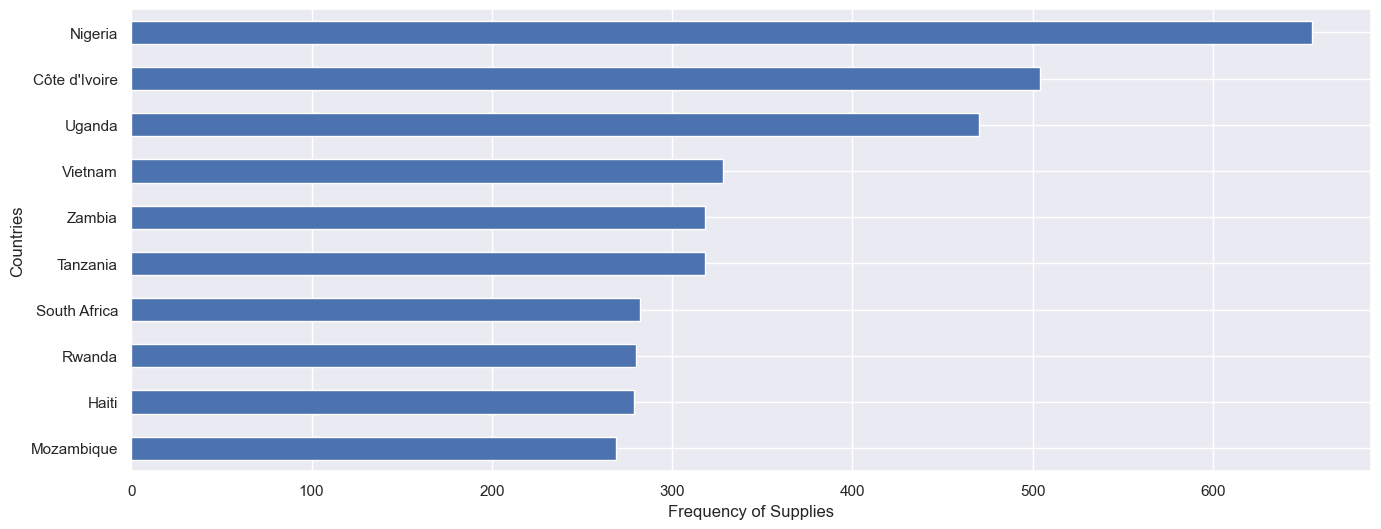

In [37]:
# Plot of Countries
data['country'].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh',xlabel='Frequency of Supplies', ylabel='Countries');
plt.savefig("Frequency_of_Orders_for_Top_10 _Countries.png", dpi=150)

#### Product Features

In [38]:
data[product_feat].nunique()

product_category      5
product_type          6
supplier             45
product_name         72
product_feature     138
product_brand        37
dosage               47
dosage_form          16
units_per_pack       28
dtype: int64

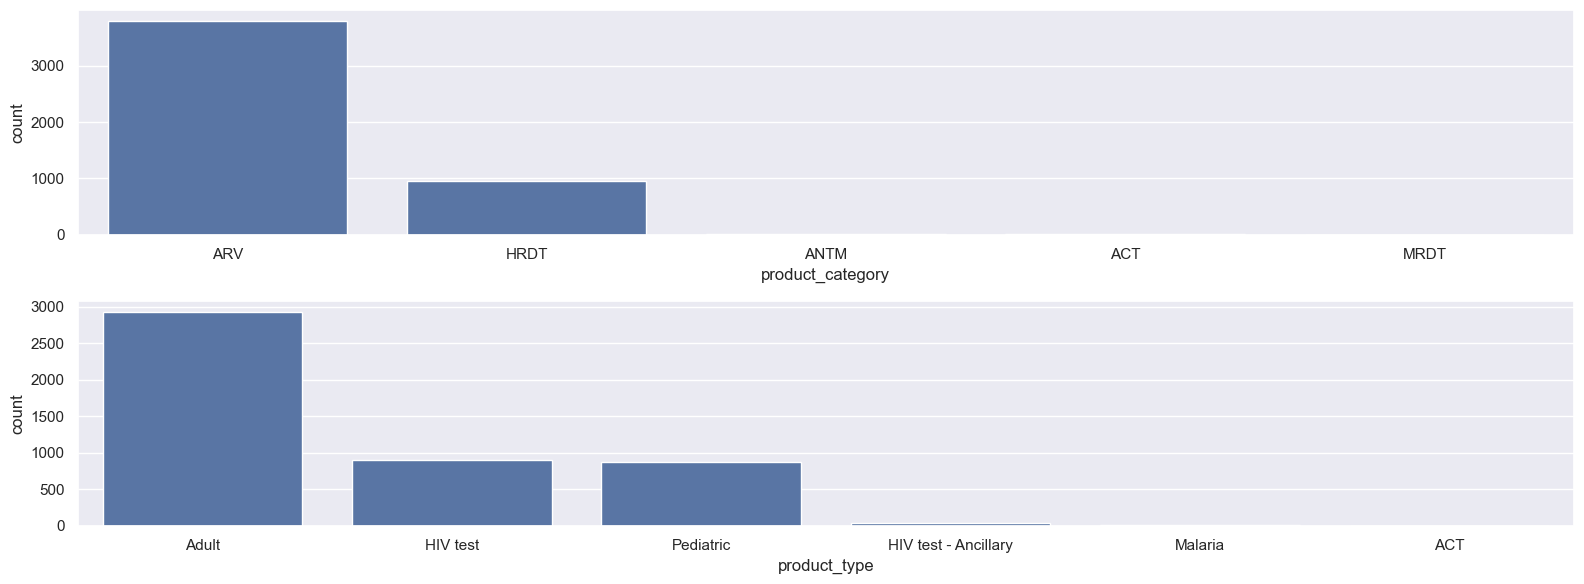

In [39]:
# Create subplots for Product type and category
fig, ax = plt.subplots(nrows=2)

# Iterate through selected columns and create a count plot for each
sns.countplot(data=data[product_feat], x='product_category', color=sns.color_palette()[0], order=data['product_category'].value_counts().index, ax=ax[0])
sns.countplot(data=data[product_feat], x='product_type', color=sns.color_palette()[0],  order=data['product_type'].value_counts().index, ax=ax[1])

plt.tight_layout();

In [40]:
round(data['product_type'].value_counts(normalize=True) * 100, 2)

Adult                   61.40
HIV test                19.05
Pediatric               18.25
HIV test - Ancillary     0.84
Malaria                  0.34
ACT                      0.13
Name: product_type, dtype: float64

In [41]:
round(data['product_category'].value_counts(normalize=True) * 100, 2)

ARV     79.65
HRDT    19.89
ANTM     0.27
ACT      0.13
MRDT     0.06
Name: product_category, dtype: float64

In [42]:
# from wordcloud import WordCloud

# # Create a word cloud from the product_brand column
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data['product_brand'].value_counts())

# # Create a plot to display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Product Brand Word Cloud');

# from wordcloud import WordCloud

# # Combine text from selected columns into a single text string
# text = ' '.join(data['supplier']) + ' ' + ' '.join(data['product_brand']) + ' ' + ' '.join(data['dosage_form']) + ' ' + ' '.join(data['dosage'])

# # Create a word cloud from the combined text
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# # Create a plot to display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Multiple Columns')

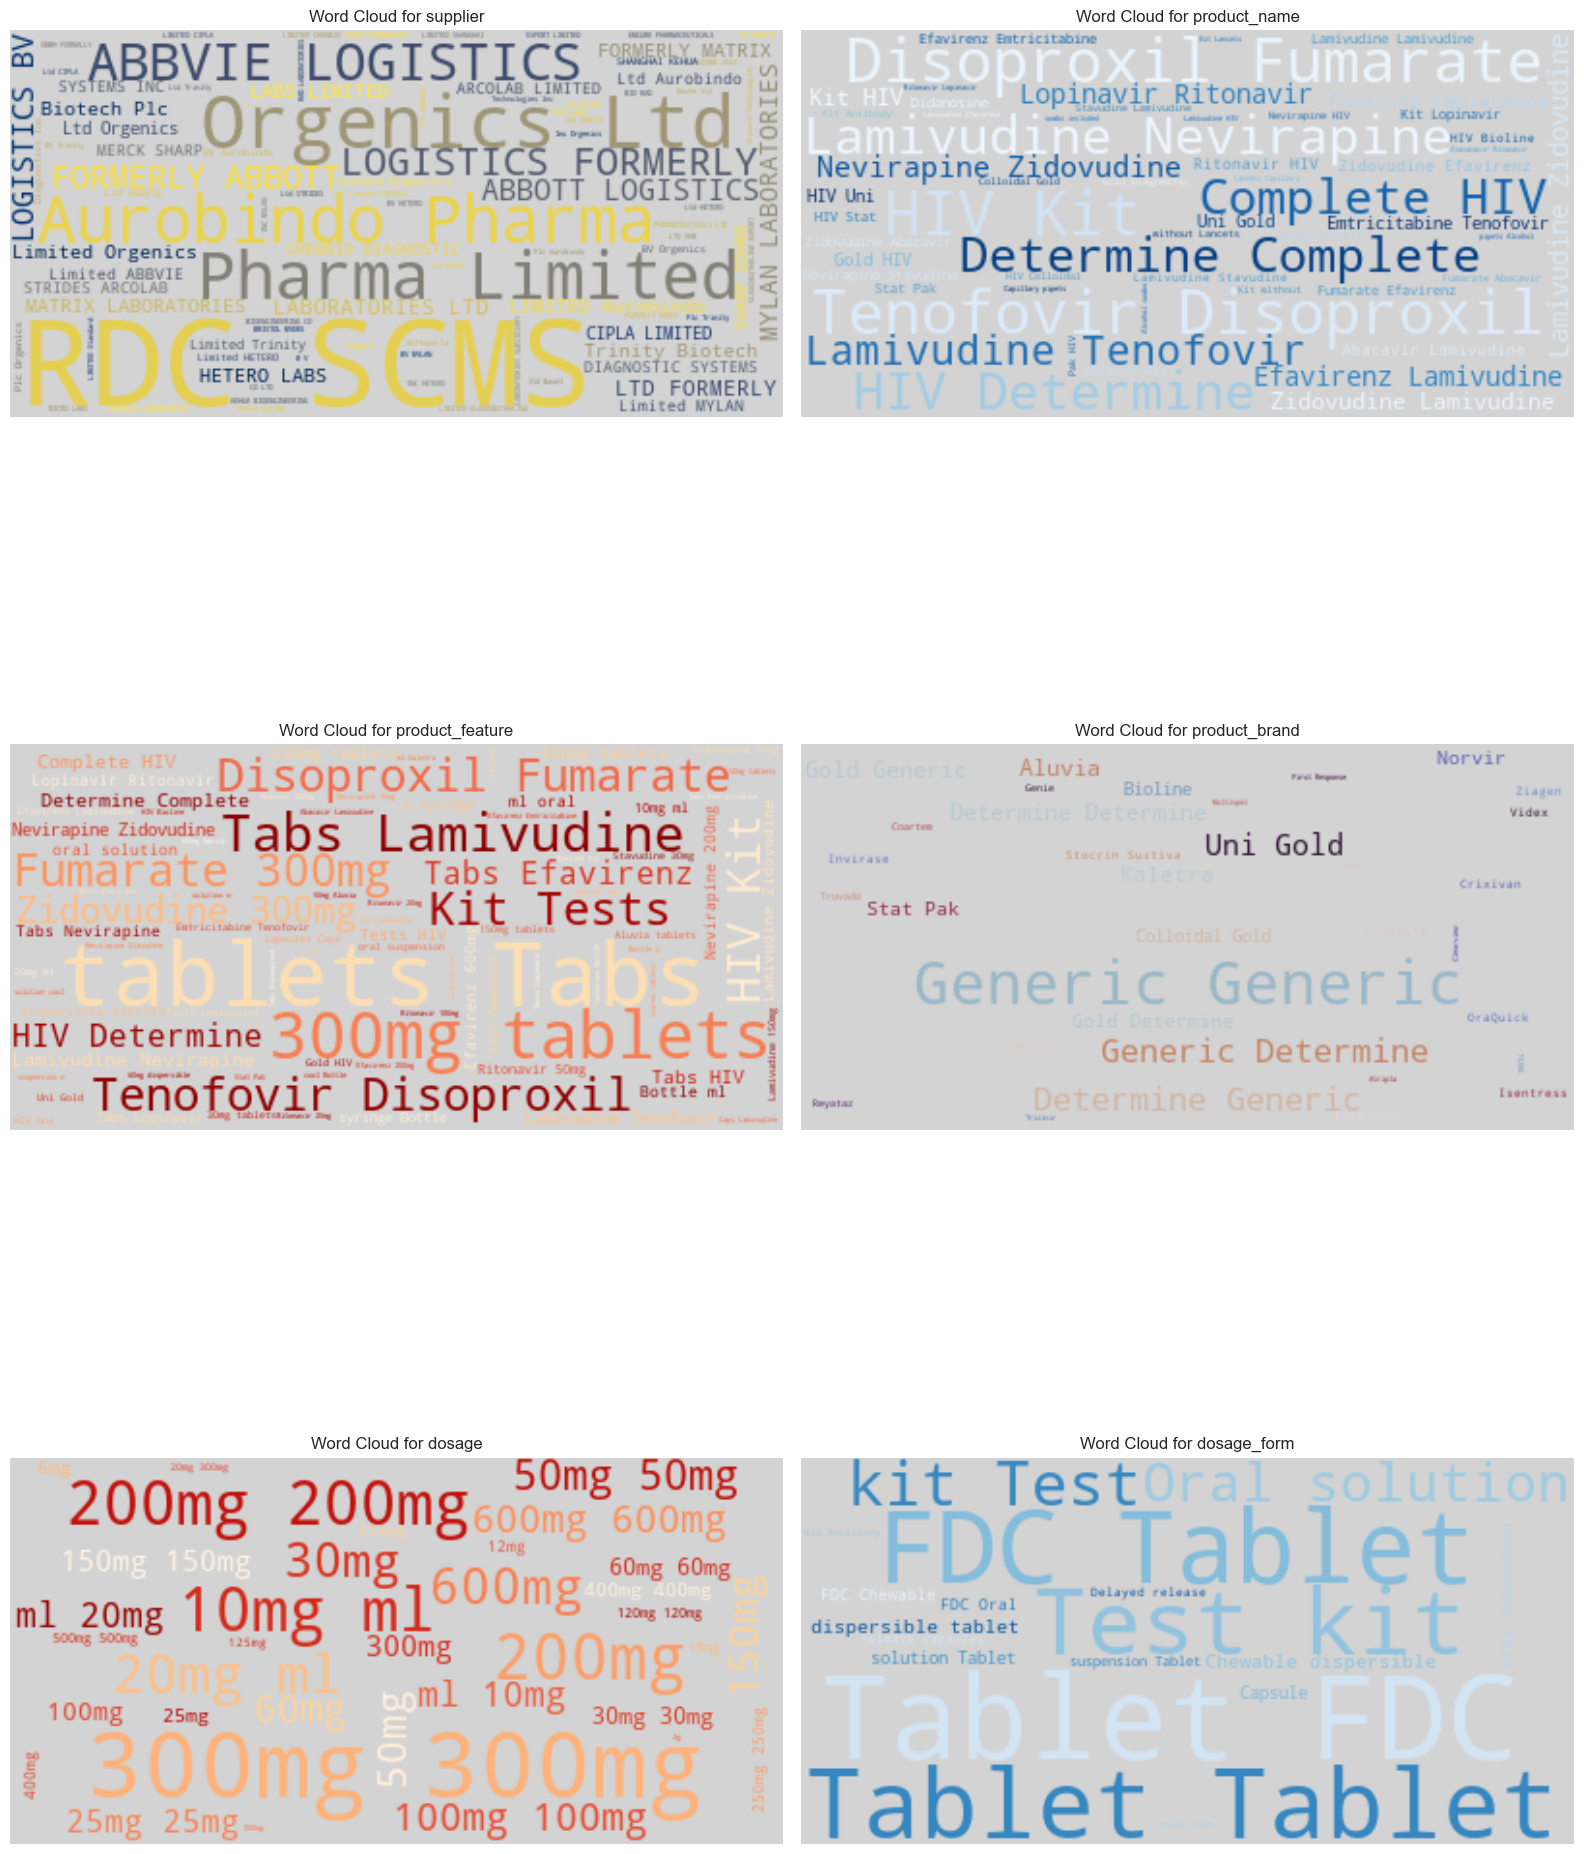

In [43]:
from wordcloud import WordCloud
import random
colors = ['OrRd', 'cividis', 'coolwarm', 'Blues', 'twilight', 'cool']
columns = ['supplier', 'product_name','product_feature', 'product_brand', 'dosage', 'dosage_form']
# Create a subplot grid based on the number of columns
num_columns = len(columns)
num_rows = (num_columns // 2) + (num_columns % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 8))

# Iterate through the columns and create word clouds
for i, col in enumerate(data[columns]):
    # Combine text from the current column into a single text string
    text = ' '.join(data[col])

    # Create a word cloud from the combined text
    wordcloud = WordCloud(width=400, height=200, background_color='lightgray', colormap=random.choice(colors)).generate(text)

    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Create a plot for the word cloud
    ax = axes[rows, cols]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {col}')

# Adjust layout and display the word clouds
plt.tight_layout()
plt.savefig("WordCloud_Chart.png", dpi=150)

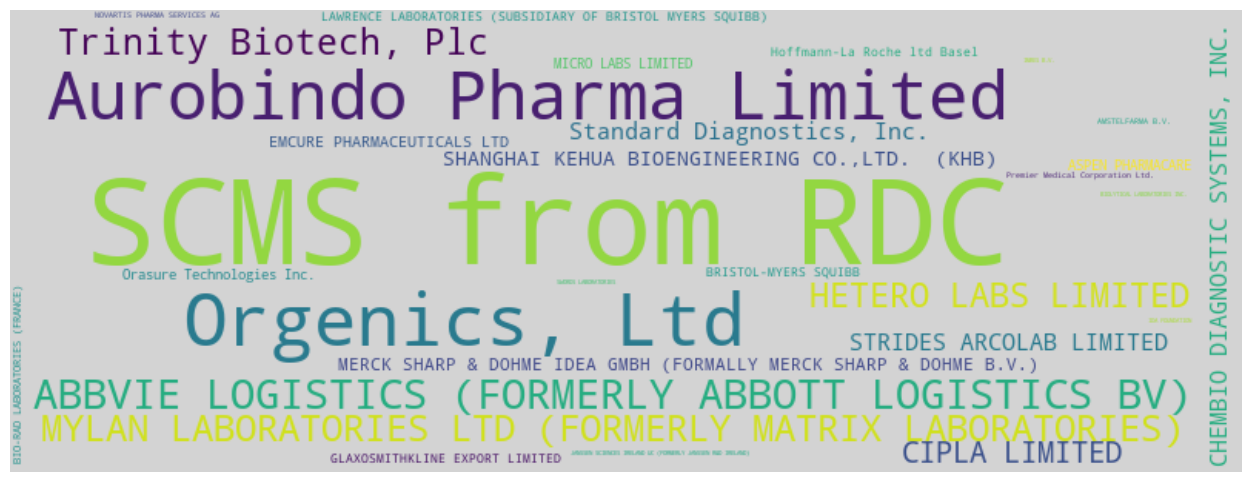

In [44]:
# Create a word cloud from the product_brand column
wordcloud = WordCloud(width=800, height=300,  background_color='lightgray').generate_from_frequencies(data['supplier'].value_counts())

# Create a plot to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

plt.savefig("Suppliers_Name_Chart.png", dpi=150)

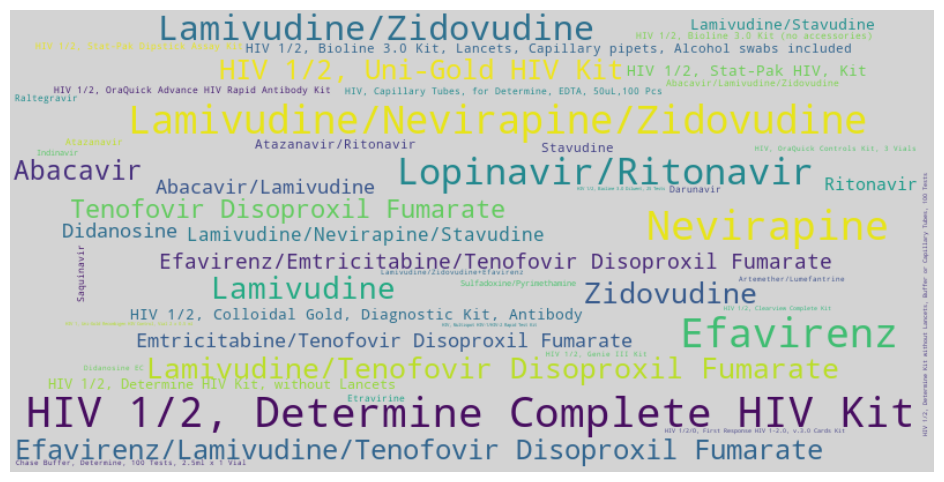

In [45]:
# Create a word cloud from the product_brand column
wordcloud = WordCloud(width=800, height=400,  background_color='lightgray').generate_from_frequencies(data['product_name'].value_counts())

# Create a plot to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

plt.savefig("Product_Name_Chart.png", dpi=150)

#### Logistics Features

In [46]:
columns_2 = data[logistics_feat].columns

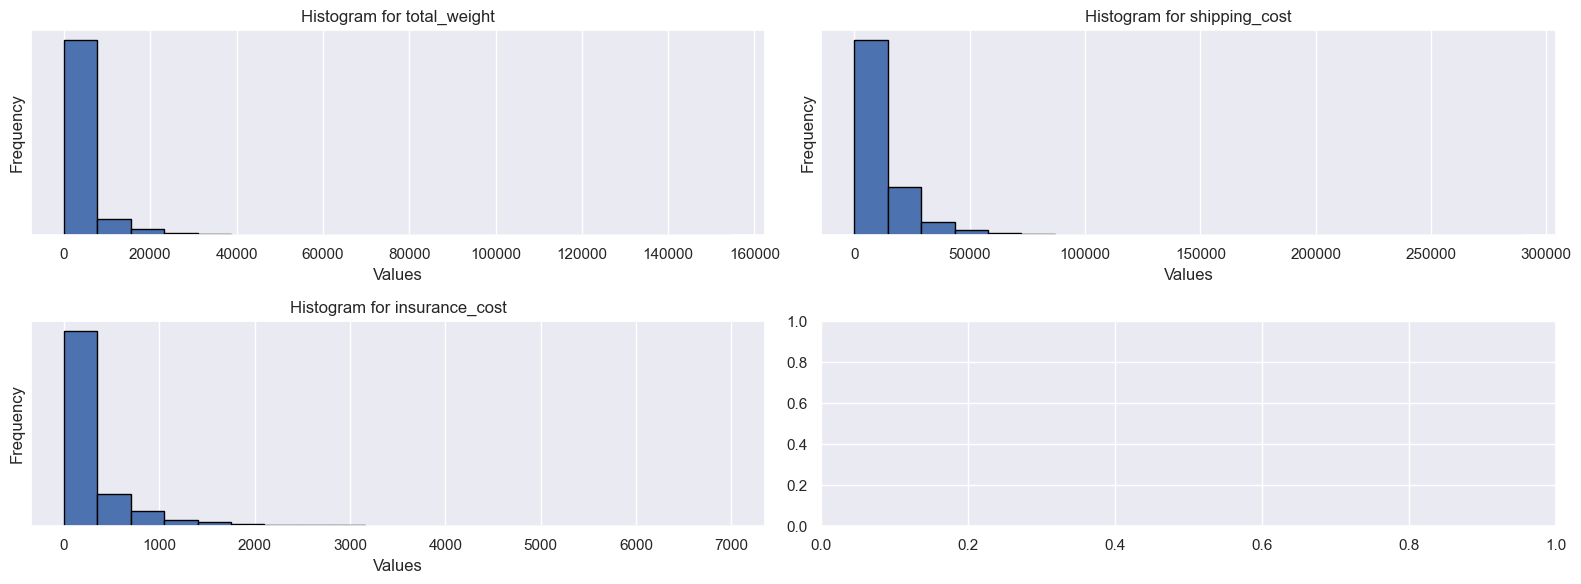

In [47]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and plot histograms
for i, col in enumerate(columns_2):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(data[col], bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
    # Remove y-axis ticks
    ax.set_yticks([])

# Adjust layout and display the histograms
plt.tight_layout()

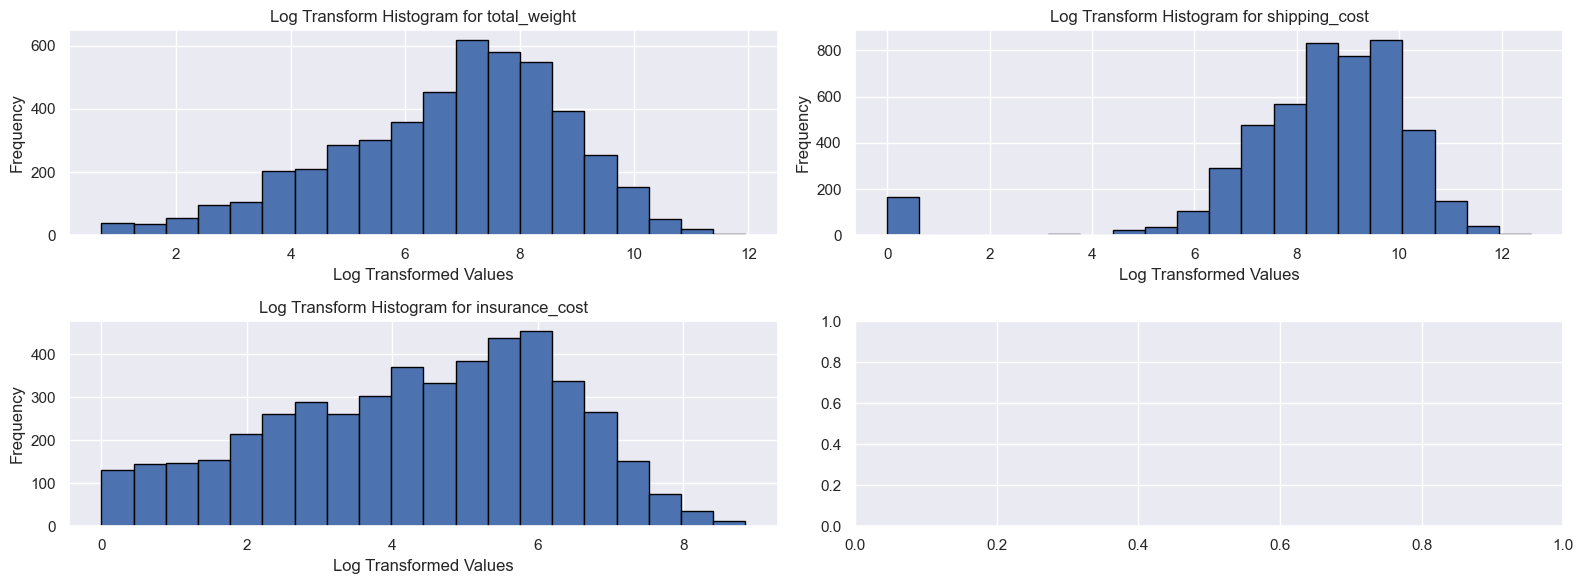

In [48]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and perform log transformation and plot histograms
for i, col in enumerate(columns_2):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Perform log transformation on the column
    transformed_data = np.log1p(data[col])  # Use np.log1p to handle zeros and negative values

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(transformed_data, bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Log Transform Histogram for {col}')
    ax.set_xlabel('Log Transformed Values')
    ax.set_ylabel('Frequency')

# Adjust layout and display the histograms
plt.tight_layout();

#### Quantity & Value Features

In [49]:
columns_3 = data[qty_value_feat].columns

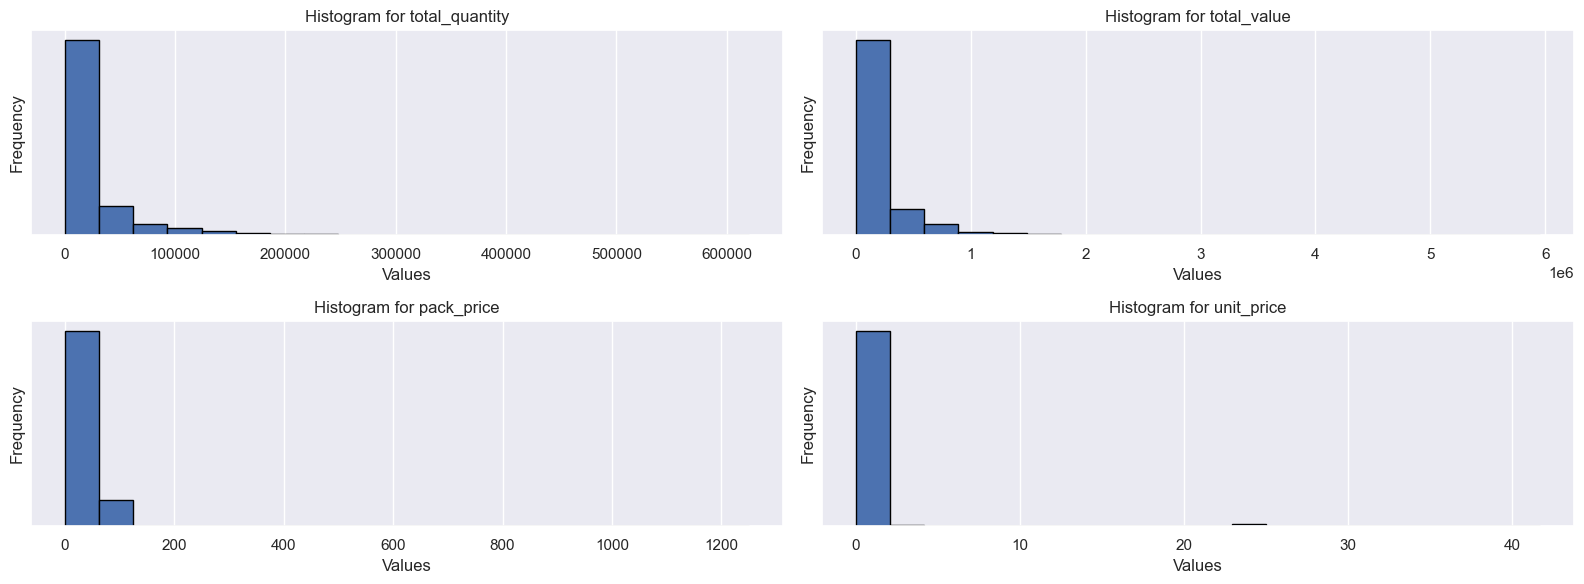

In [50]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and plot histograms
for i, col in enumerate(columns_3):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(data[col], bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
    # Remove y-axis ticks
    ax.set_yticks([])

# Adjust layout and display the histograms
plt.tight_layout()

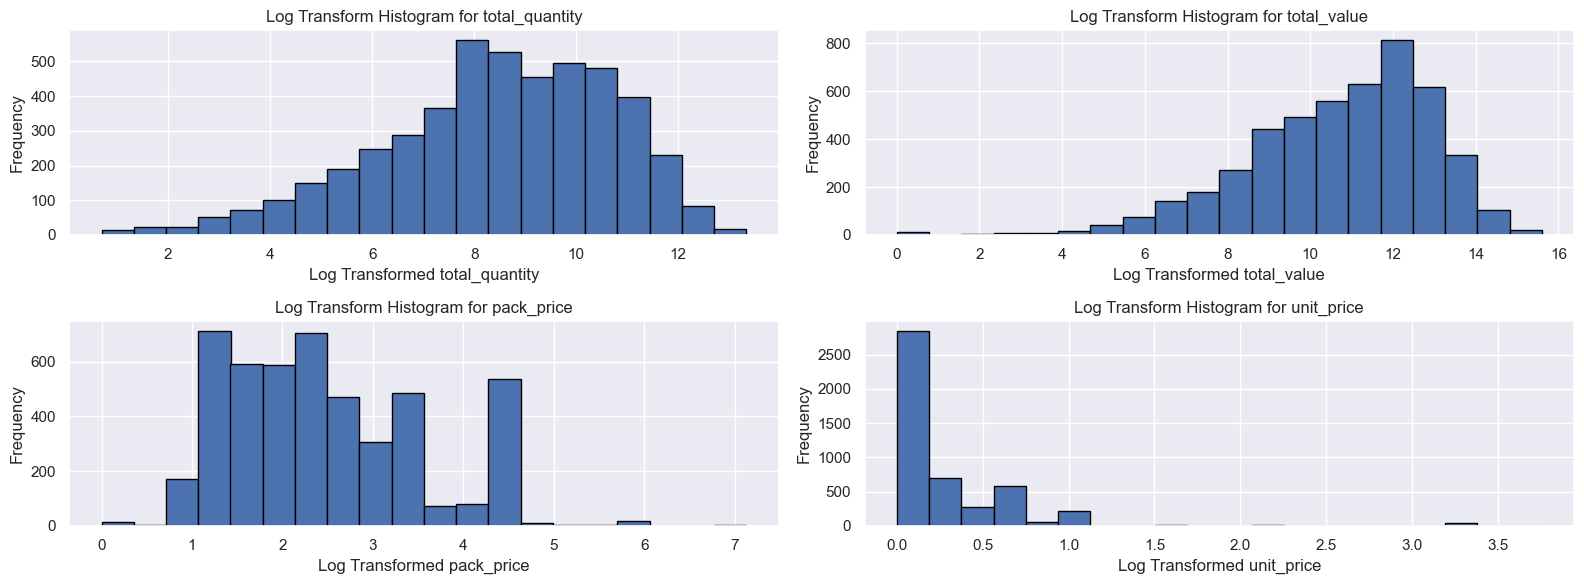

In [51]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and perform log transformation and plot histograms
for i, col in enumerate(columns_3):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Perform log transformation on the column
    transformed_data = np.log1p(data[col])  # Use np.log1p to handle zeros and negative values

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(transformed_data, bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Log Transform Histogram for {col}')
    ax.set_xlabel(f'Log Transformed {col}')
    ax.set_ylabel('Frequency')

# Adjust layout and display the histograms
plt.tight_layout();

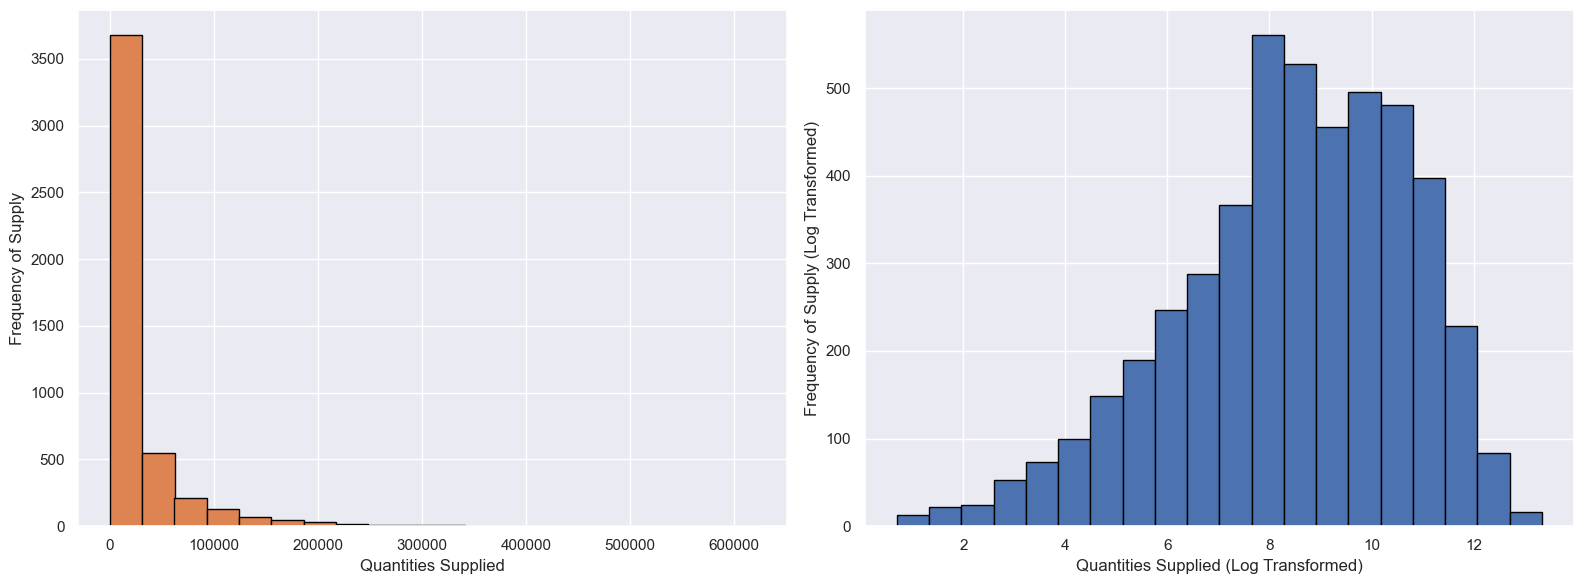

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram without log transformation
axes[0].hist(data["total_quantity"], bins=20, color=sns.color_palette()[1], edgecolor='black')
# axes[0].set_title('Original Quantities')
axes[0].set_xlabel('Quantities Supplied')
axes[0].set_ylabel('Frequency of Supply')

# Histogram with log transformation
transformed_qty = np.log1p(data["total_quantity"]) 
axes[1].hist(transformed_qty, bins=20, color=sns.color_palette()[0], edgecolor='black')
# axes[1].set_title('Log Transformed Quantities')
axes[1].set_xlabel('Quantities Supplied (Log Transformed)')
axes[1].set_ylabel('Frequency of Supply (Log Transformed)')



# Adjust layout and display the histograms
plt.tight_layout()
plt.savefig("Log_Transform_vs_Original_Quantities.png", dpi=150)

#### Shipment Features

In [53]:
data[shipment_feat].nunique()

manager            2
delivery_method    2
vendor_terms       8
transport_mode     4
dtype: int64

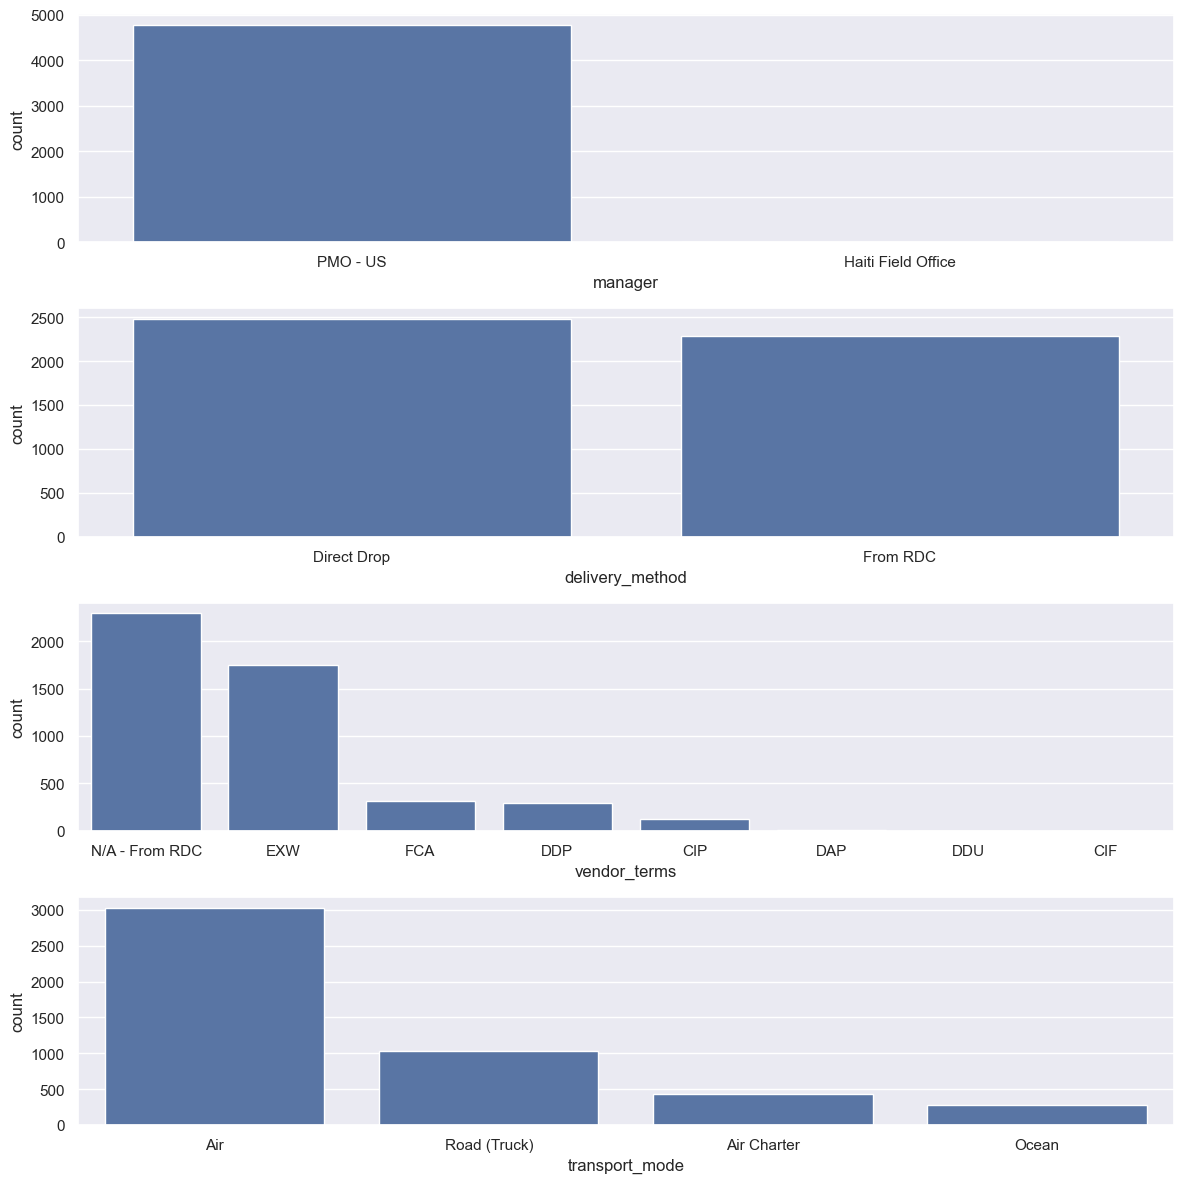

In [54]:
# Create subplots for each column
fig, ax = plt.subplots(nrows=4, figsize=(12, 12))

# Iterate through selected columns and create a count plot for each
sns.countplot(data=data[shipment_feat], x='manager', color=sns.color_palette()[0], order=data['manager'].value_counts().index,ax=ax[0])
sns.countplot(data=data[shipment_feat], x='delivery_method', color=sns.color_palette()[0], order=data['delivery_method'].value_counts().index, ax=ax[1])
sns.countplot(data=data[shipment_feat], x='vendor_terms', color=sns.color_palette()[0], order=data['vendor_terms'].value_counts().index,ax=ax[2])
sns.countplot(data=data[shipment_feat], x='transport_mode', color=sns.color_palette()[0],order=data['transport_mode'].value_counts().index, ax=ax[3])

plt.tight_layout();

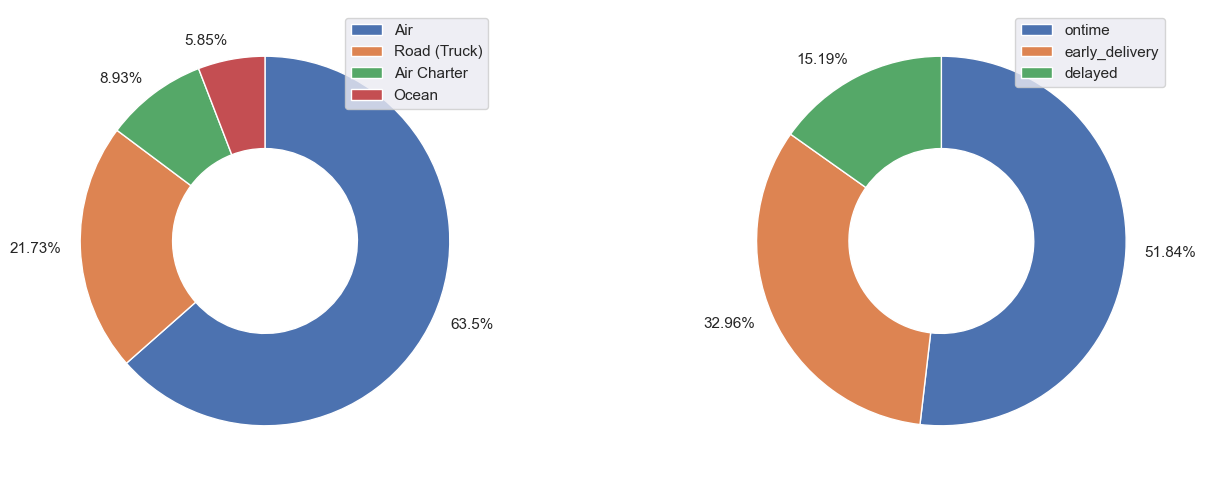

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.subplot(1, 2, 1)
# Plot of Shipement Mode distribution
shipmentcount = round(data["transport_mode"].value_counts(normalize=True)*100,2)
plt.pie(shipmentcount, labels=[f"{str(x)}%" for x in shipmentcount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});
# plt.title('Shipment Mode Distribution', fontsize=14)
plt.legend(shipmentcount.index);

plt.subplot(1, 2, 2)
# Plot of Shipement Mode distribution
statuscount = round(data["delivery_status"].value_counts(normalize=True)*100,2)
plt.pie(statuscount, labels=[f"{str(x)}%" for x in statuscount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});
# plt.title('Delivery Status Distribution', fontsize=14)
plt.legend(statuscount.index);
plt.savefig("Shipment_Mode_&_Delivery_Status_Chart.png", dpi=150)

## Bivariate Analysis

#### Delivery Method vs. Total Quantity

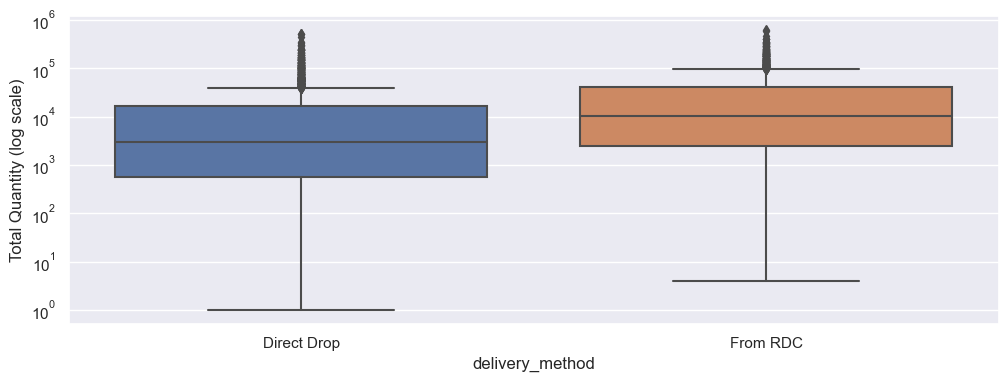

In [56]:
fig, axes = plt.subplots(figsize=(12, 4))

# Delivery Method vs. Total Quantity
sns.boxplot(x='delivery_method', y='total_quantity', data=data)
# plt.title('Delivery Method vs. Total Quantity')

# Set the y-axis to a logarithmic scale
axes.set_yscale('log')

# Set a label for the y-axis to indicate the scale
axes.set_ylabel('Total Quantity (log scale)');
plt.savefig("Delivery_Method_versus_Total_Quantity.png", dpi=150)

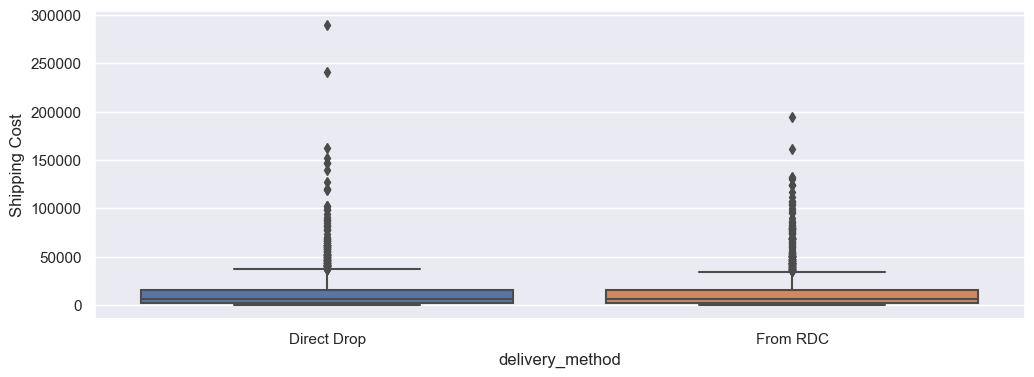

In [57]:
fig, axes = plt.subplots(figsize=(12, 4))

# Delivery Method vs. Total Quantity
sns.boxplot(x='delivery_method', y='shipping_cost', data=data)
# plt.title('Delivery Method vs. Total Quantity')

# Set the y-axis to a logarithmic scale
# axes.set_yscale('log')

# Set a label for the y-axis to indicate the scale
axes.set_ylabel('Shipping Cost');
plt.savefig("Delivery_Method_versus_Shipping_Cost.png", dpi=150)

This reveals disparities in the quantity of orders handled using the differnt delivery method

#### Delivery Method versus Total value & Total quantity

We can see that the method of delivery affects both quantity and the value significantly

#### Product Category wrt Total value , Total quantity, Unit Cost & and Insurance Cost

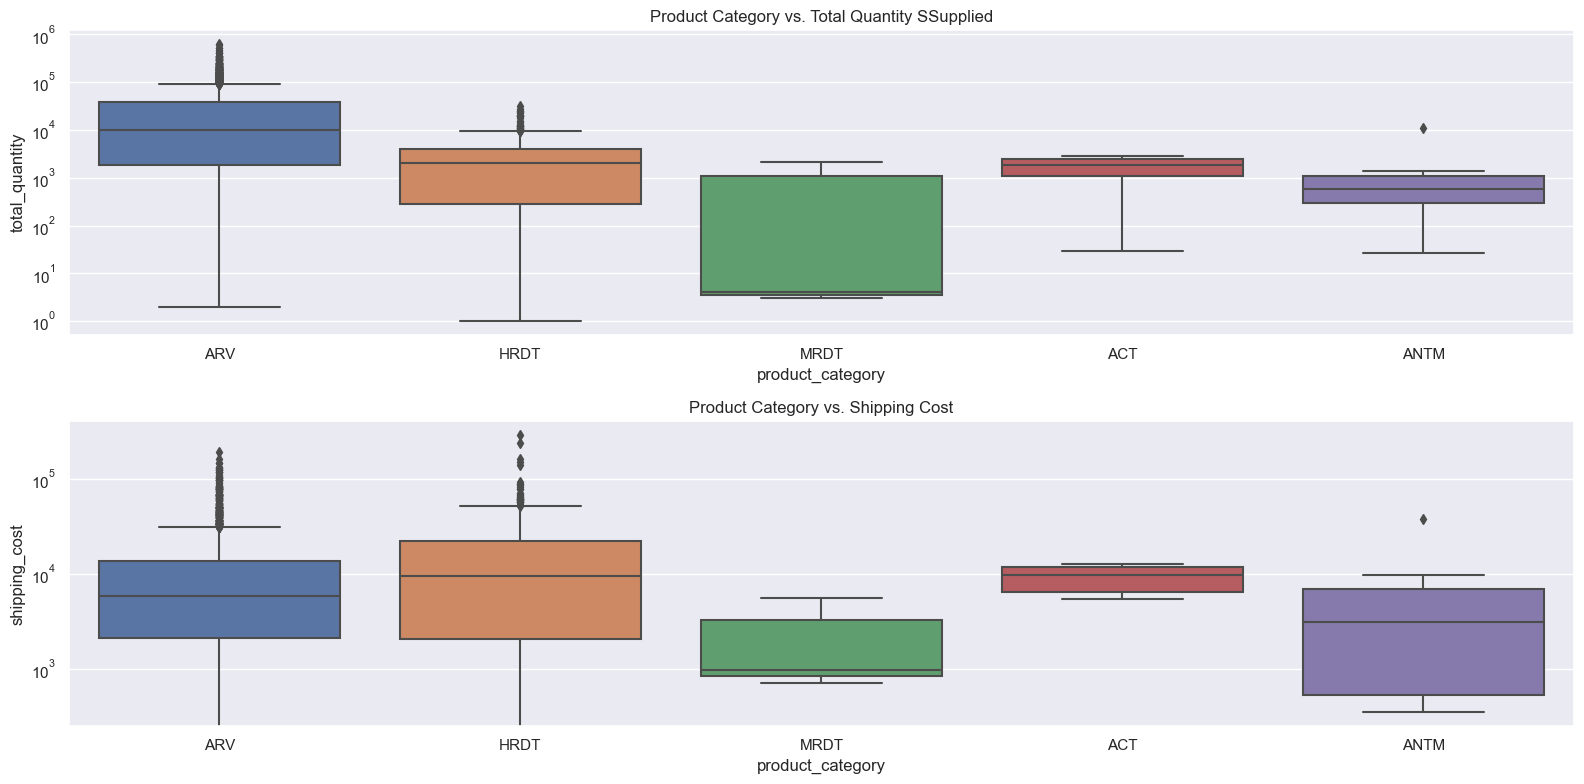

In [58]:
# Create a 2x1 subplot figure with a specific figure size
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Subplot 1: Product Category vs. Total Quantity
sns.boxplot(x='product_category', y='total_quantity', data=data, ax=axes[0])
axes[0].set_title('Product Category vs. Total Quantity SSupplied')
axes[0].set_yscale('log')  # Set the y-axis to a logarithmic scale

# Subplot 2: Product Category vs. Unit Price
sns.boxplot(x='product_category', y='shipping_cost', data=data, ax=axes[1])
axes[1].set_title('Product Category vs. Shipping Cost')
axes[1].set_yscale('log')  # Set the y-axis to a logarithmic scale

plt.tight_layout()
plt.savefig("Product_Category_versus_Total_Quantity_&_Shipping_Cost.png", dpi=150)

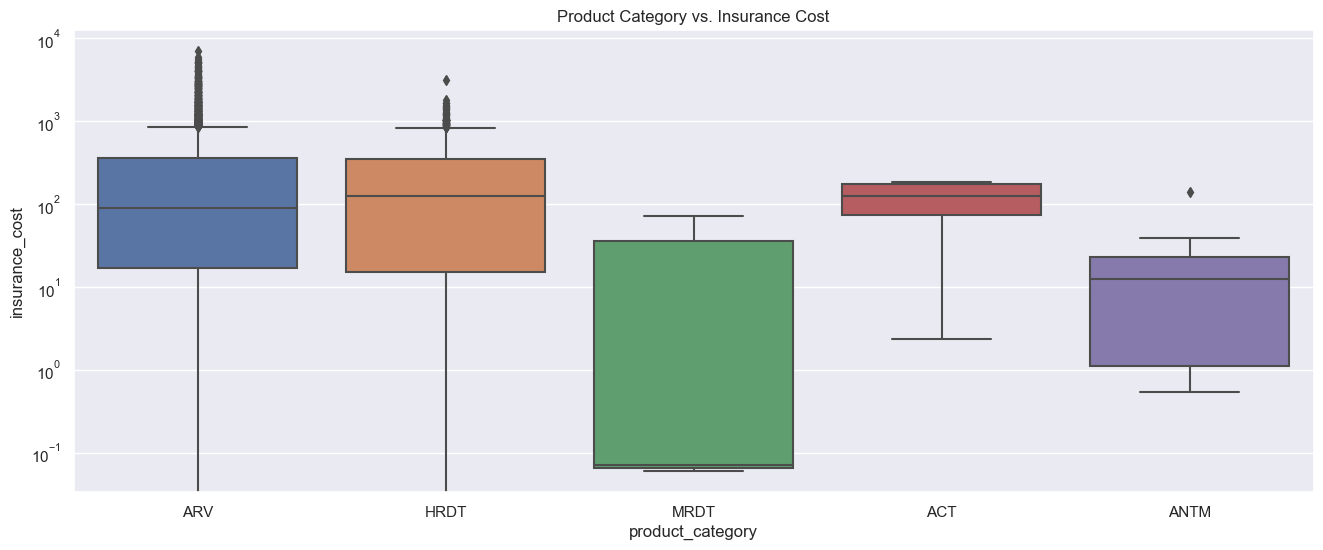

In [59]:
sns.boxplot(x='product_category', y='insurance_cost', data=data)
plt.title('Product Category vs. Insurance Cost')
plt.yscale('log')  # Set the y-axis to a logarithmic scale

While ARV product records high quantity and high purchase, it seems to be a relatively cheap considering the unit price

#### Product Type vs. Total value , Total quantity, Unit Cost & and Insurance Cost

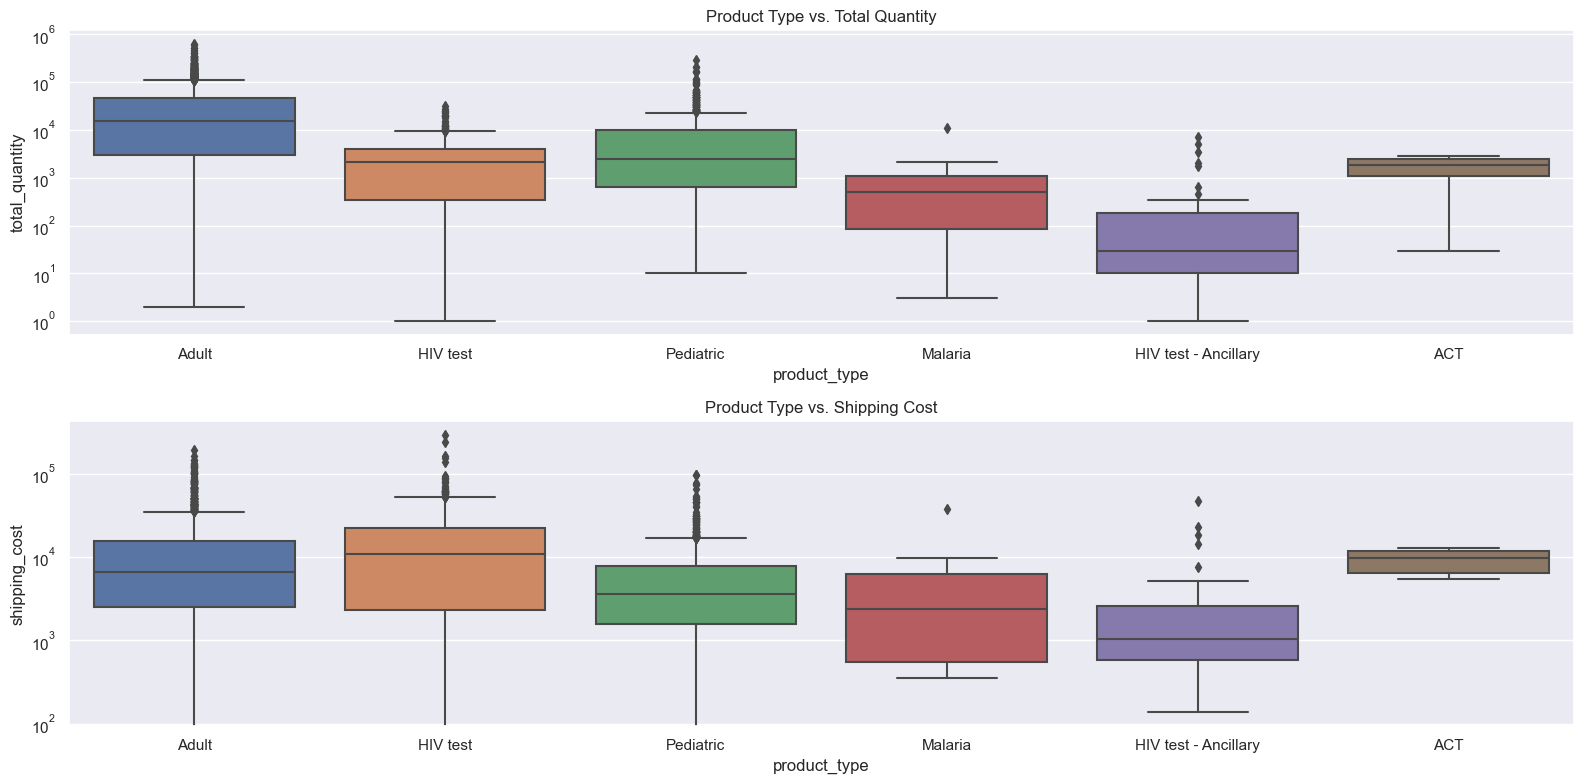

In [60]:
# Create a 2x1 subplot figure with a specific figure size
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Subplot 1: Product Type vs. Total Quantity
sns.boxplot(x='product_type', y='total_quantity', data=data, ax=axes[0])
axes[0].set_title('Product Type vs. Total Quantity')
axes[0].set_yscale('log')  # Set the y-axis to a logarithmic scale

# Subplot 2: Product Type vs. Unit Price
sns.boxplot(x='product_type', y='shipping_cost', data=data, ax=axes[1])
axes[1].set_title('Product Type vs. Shipping Cost')
axes[1].set_yscale('log')  # Set the y-axis to a logarithmic scale

plt.tight_layout();
# plt.savefig("Product_Type_versus_Total_Quantity_&_Unit_Price.png", dpi=150)

Similar observation can be made concerning this too

#### Transport Mode vs. Cost per Unit Weight and  Total quantity

In [61]:
data["shipping_cost_per_weight"] = data["shipping_cost"] / data["total_weight"]

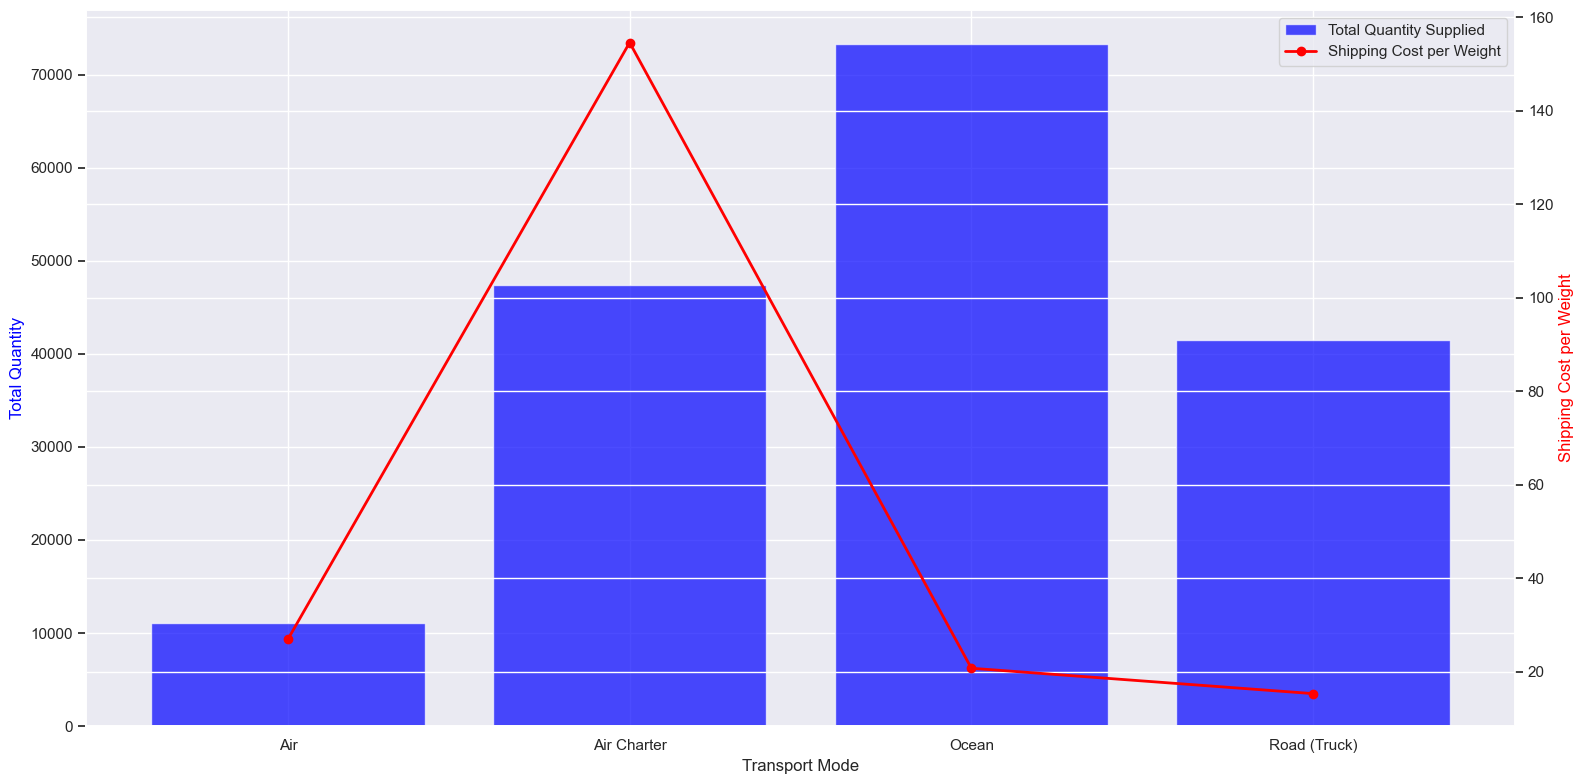

In [62]:
# Define the data
transport_quantity_data = data.groupby('transport_mode')['total_quantity'].mean()
transport_cost_weight = data.groupby('transport_mode')['shipping_cost_per_weight'].mean()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(16, 8))

# Set the x-axis labels
index = range(len(transport_quantity_data))

# Plot Total Quantity as bars
ax1.bar(index, transport_quantity_data, color='blue', alpha=0.7, label='Total Quantity Supplied')

# Set the y-axis label for Total Quantity
ax1.set_ylabel('Total Quantity', color='blue')

# Create a secondary y-axis for Cost per Weight
ax2 = ax1.twinx()
ax2.plot(index, transport_cost_weight, color='red', marker='o', linestyle='-', linewidth=2, label='Shipping Cost per Weight')

# Set the y-axis label for Cost per Weight
ax2.set_ylabel('Shipping Cost per Weight', color='red')

# Set the x-axis labels and title
ax1.set_xticks(index)
ax1.set_xticklabels(transport_quantity_data.index, rotation=0)
ax1.set_xlabel('Transport Mode')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show plot
# plt.title('Total Quantity and Shipping Cost per Weight by Transport Mode')
plt.tight_layout()
plt.savefig("Total_Quantity_and_Shipping_Cost_per_Weight_by_Transport_Mode.png", dpi=150)

In [63]:
data.groupby(data['transport_mode'])[['shipping_cost_per_weight', 'total_quantity']].sum().sort_values(by='shipping_cost_per_weight')

shipping_cost_per_weight  total_quantity
transport_mode                                          
Ocean                        5792.328632        20441903
Road (Truck)                15897.670660        43066428
Air Charter                 65862.455400        20201149
Air                         81705.800588        33660884

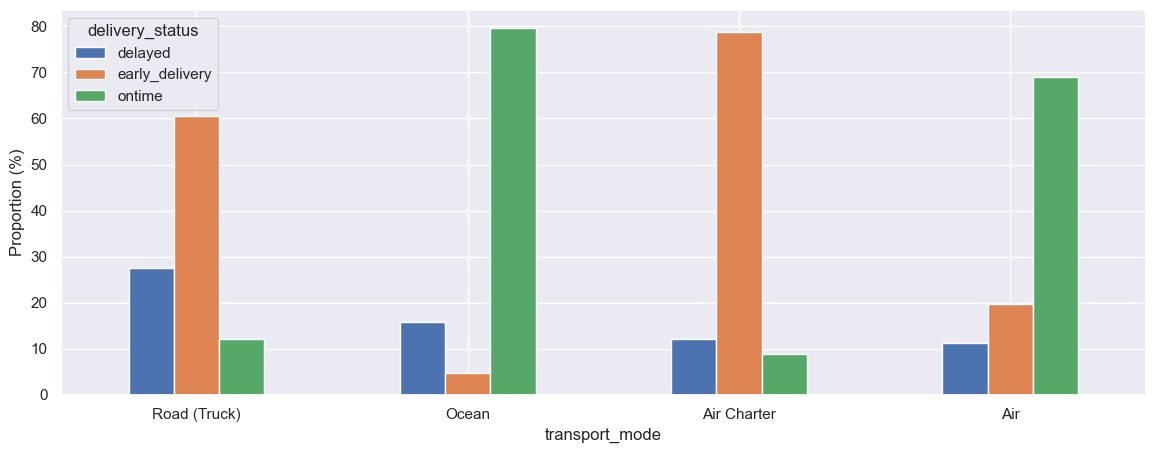

In [64]:
# Calculate proportions 
proportions = data.pivot_table(index='transport_mode', columns='delivery_status', aggfunc='size', fill_value=0)
proportions = proportions.divide(proportions.sum(axis=1), axis=0)
proportions_plot = proportions.mul(100).round(2)

# Sort the DataFrame based on 'delayed' column for the bar plot
proportions_plot_sorted = proportions_plot.sort_values(by='delayed', ascending=False)

# Create a bar plot for proportions
fig, ax = plt.subplots(figsize=(14, 5))
proportions_plot_sorted.plot(kind='bar', ax=ax)
ax.set_ylabel('Proportion (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
# ax.set_title('Proportion of Delivery Status by Transport Mode')
plt.savefig("Transport_Mode_Delivery_Status.png", dpi=150)

In [65]:
# Display the table sorted by 'delayed' column
proportions_plot_sorted = proportions_plot_sorted.astype(str) + '%'
proportions_plot_sorted.sort_values(by='delayed', ascending=False)

delivery_status delayed early_delivery  ontime
transport_mode                                
Road (Truck)     27.48%         60.46%  12.05%
Ocean            15.77%          4.66%  79.57%
Air Charter      12.21%         78.87%   8.92%
Air              11.35%          19.7%  68.94%

While Air transportation mode seems to be more robust (wide variation), Truck still carries more quantity of the commodities which also acount for the highest values of commodities transported, where Air shipping cost seems to be more expensive and carries more heavy weight commodities

#### Supplier vs. Total Quantity and Total Value

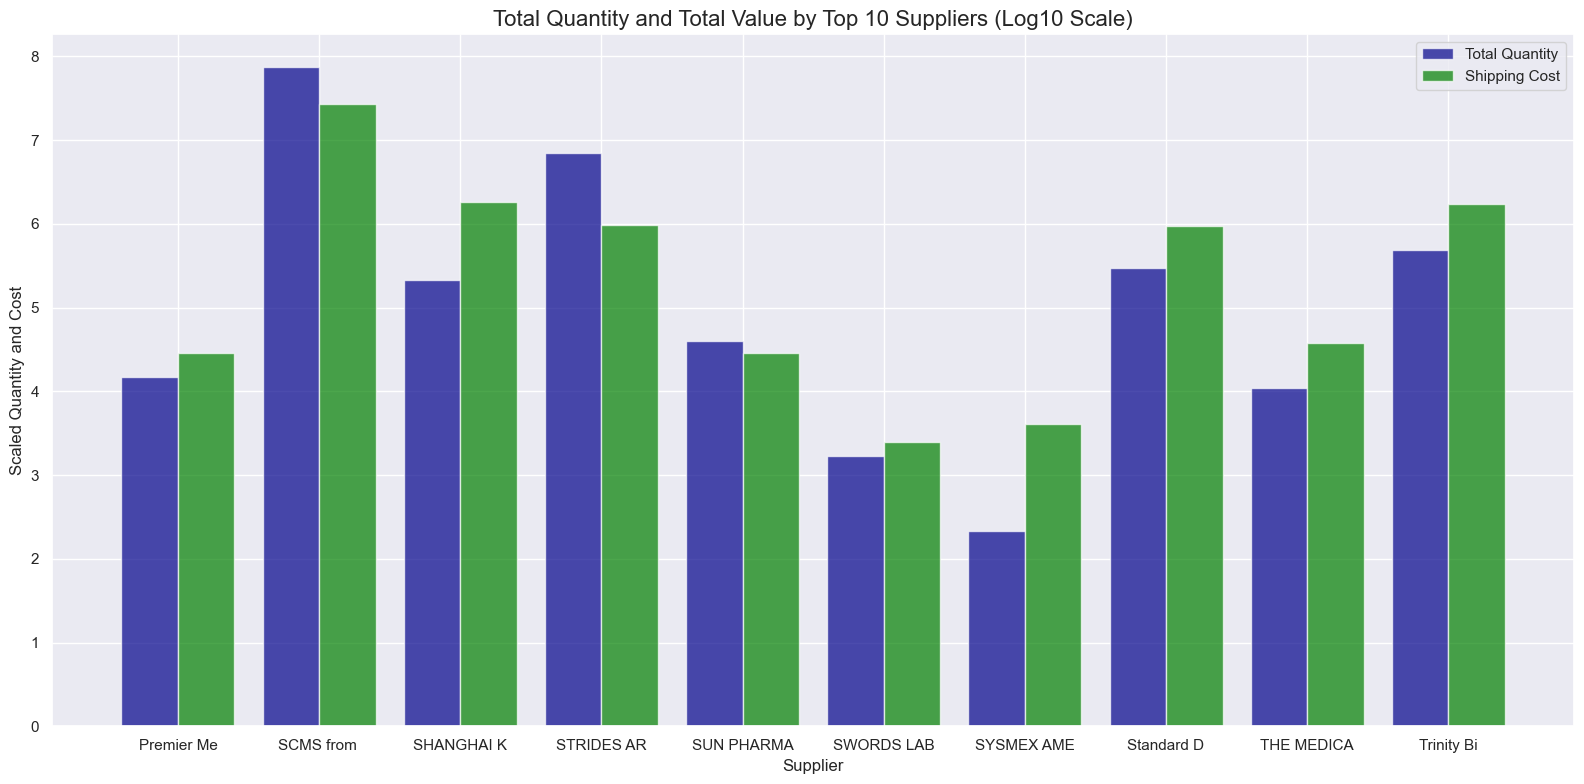

In [66]:
# Define the data
supplier_quantity_data = data.groupby('supplier')['total_quantity'].sum().tail(10)
supplier_quantity_data.index = supplier_quantity_data.index.str[:10]  # Slice the index to the first 5 characters
supplier_value_data = data.groupby('supplier')['shipping_cost'].sum().tail(10)
supplier_value_data.index = supplier_value_data.index.str[:10]  # Slice the index to the first 5 characters

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Set the bar width and positions
bar_width = 0.4
index = np.arange(len(supplier_quantity_data))

# Plot Total Quantity
ax.bar(index, np.log10(supplier_quantity_data), bar_width, label='Total Quantity', color='darkblue', alpha=0.7)

# Plot Total Value
ax.bar(index + bar_width, np.log10(supplier_value_data), bar_width, label='Shipping Cost', color='green', alpha=0.7)

# Set the x-axis labels and title
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(supplier_quantity_data.index, rotation=0)
ax.set_xlabel('Supplier')
ax.set_title('Total Quantity and Total Value by Top 10 Suppliers (Log10 Scale)', fontsize=16)

# Set the y-axis label
ax.set_ylabel('Scaled Quantity and Cost')

# Add a legend
ax.legend()

plt.tight_layout();
# plt.savefig("Total_Quantity_and_Shipping_Cost_by_Top_10_Suppliers.png", dpi=150)

#### Shipping Cost wrt Total value , Insurance Cost, Total Quantity, and Total Weight

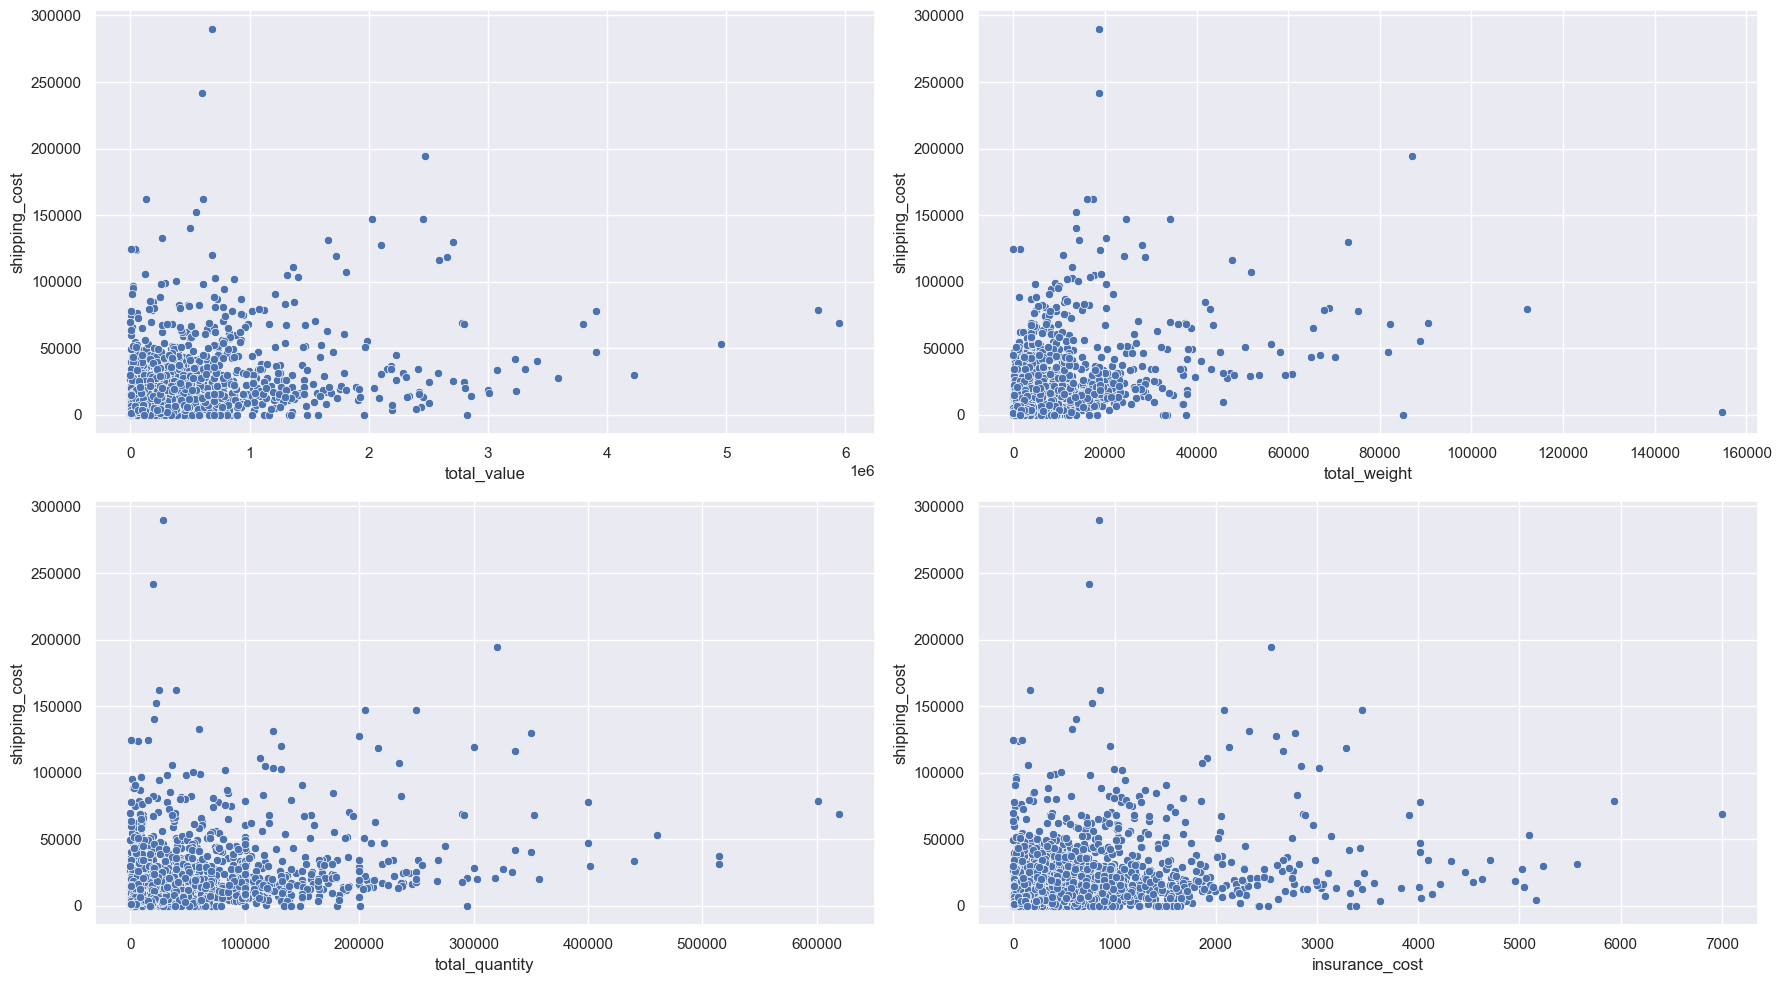

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Subplot 1: Total Quantity vs. Total Value 
plt.subplot(2, 2, 1)
sns.scatterplot(x='total_value', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Total Value')

# Subplot 2: Total Quantity vs. Total Weight 
plt.subplot(2, 2, 2)
sns.scatterplot(x='total_weight', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Total Weight')

# Subplot 3: Total Quantity vs. Shipping Cost
plt.subplot(2, 2, 3)
sns.scatterplot(x='total_quantity', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Shipping Cost')

# Subplot 4: Total Quantity vs. Insurance Cost 
plt.subplot(2, 2, 4)
sns.scatterplot(x='insurance_cost', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Insurance Cost')

# Adjust spacing between subplots
plt.tight_layout();
plt.savefig("Shipping_versus_weight_value_insurance_&_total_quantity.png", dpi=150)

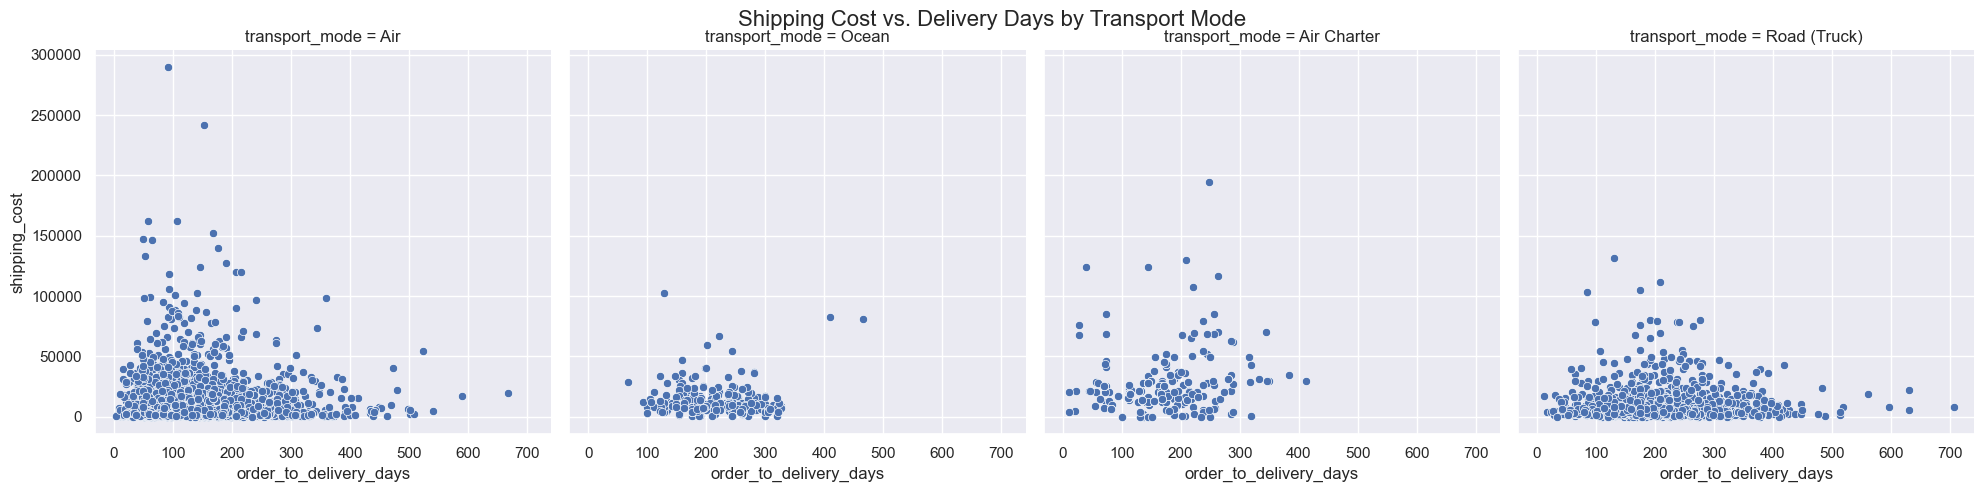

In [68]:
sns.relplot(x='order_to_delivery_days', y='shipping_cost', col='transport_mode', kind='scatter', data=data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Shipping Cost vs. Delivery Days by Transport Mode', fontsize=16)
plt.savefig("Shipping_Cost_&_Delivery_Days_by_Transport_Mode.png", dpi=150)
plt.show()

There seems to be a very sting positive relationships with the variables except for the case of total weight

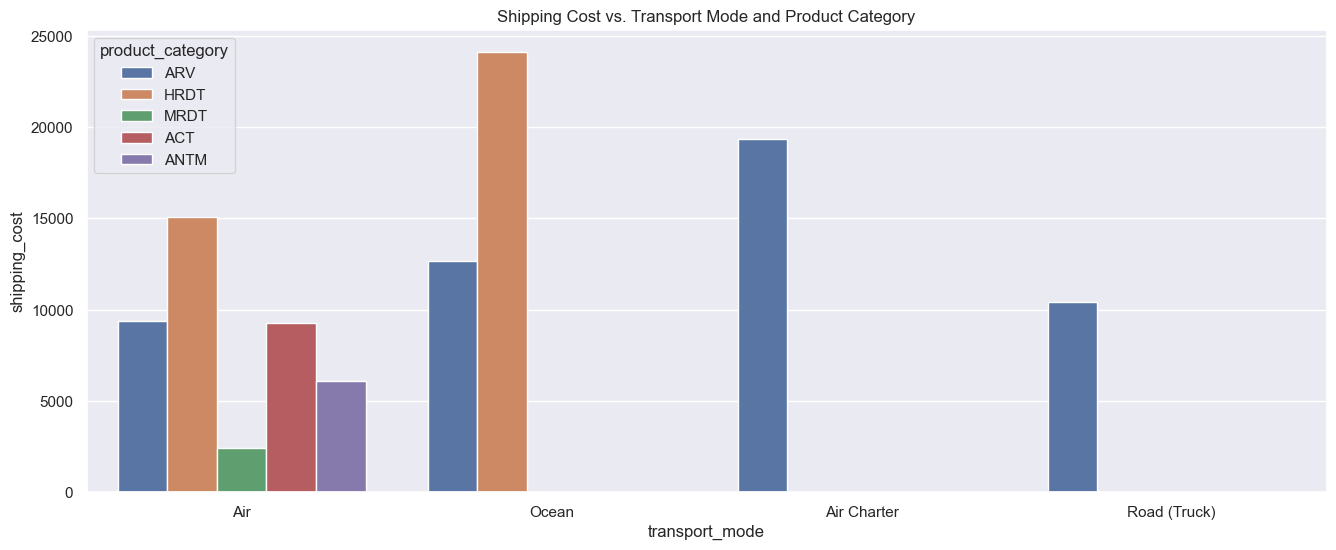

In [69]:
sns.barplot(x='transport_mode', y='shipping_cost', hue='product_category', data=data, ci=None)
plt.title('Shipping Cost vs. Transport Mode and Product Category');
plt.savefig("Shipping_Cost_by_Transport_Mode_&_Product_Category.png", dpi=150)

#### Delivery Method vs. Total quantities, Delivery status, Shipping cost, and Total Weight  

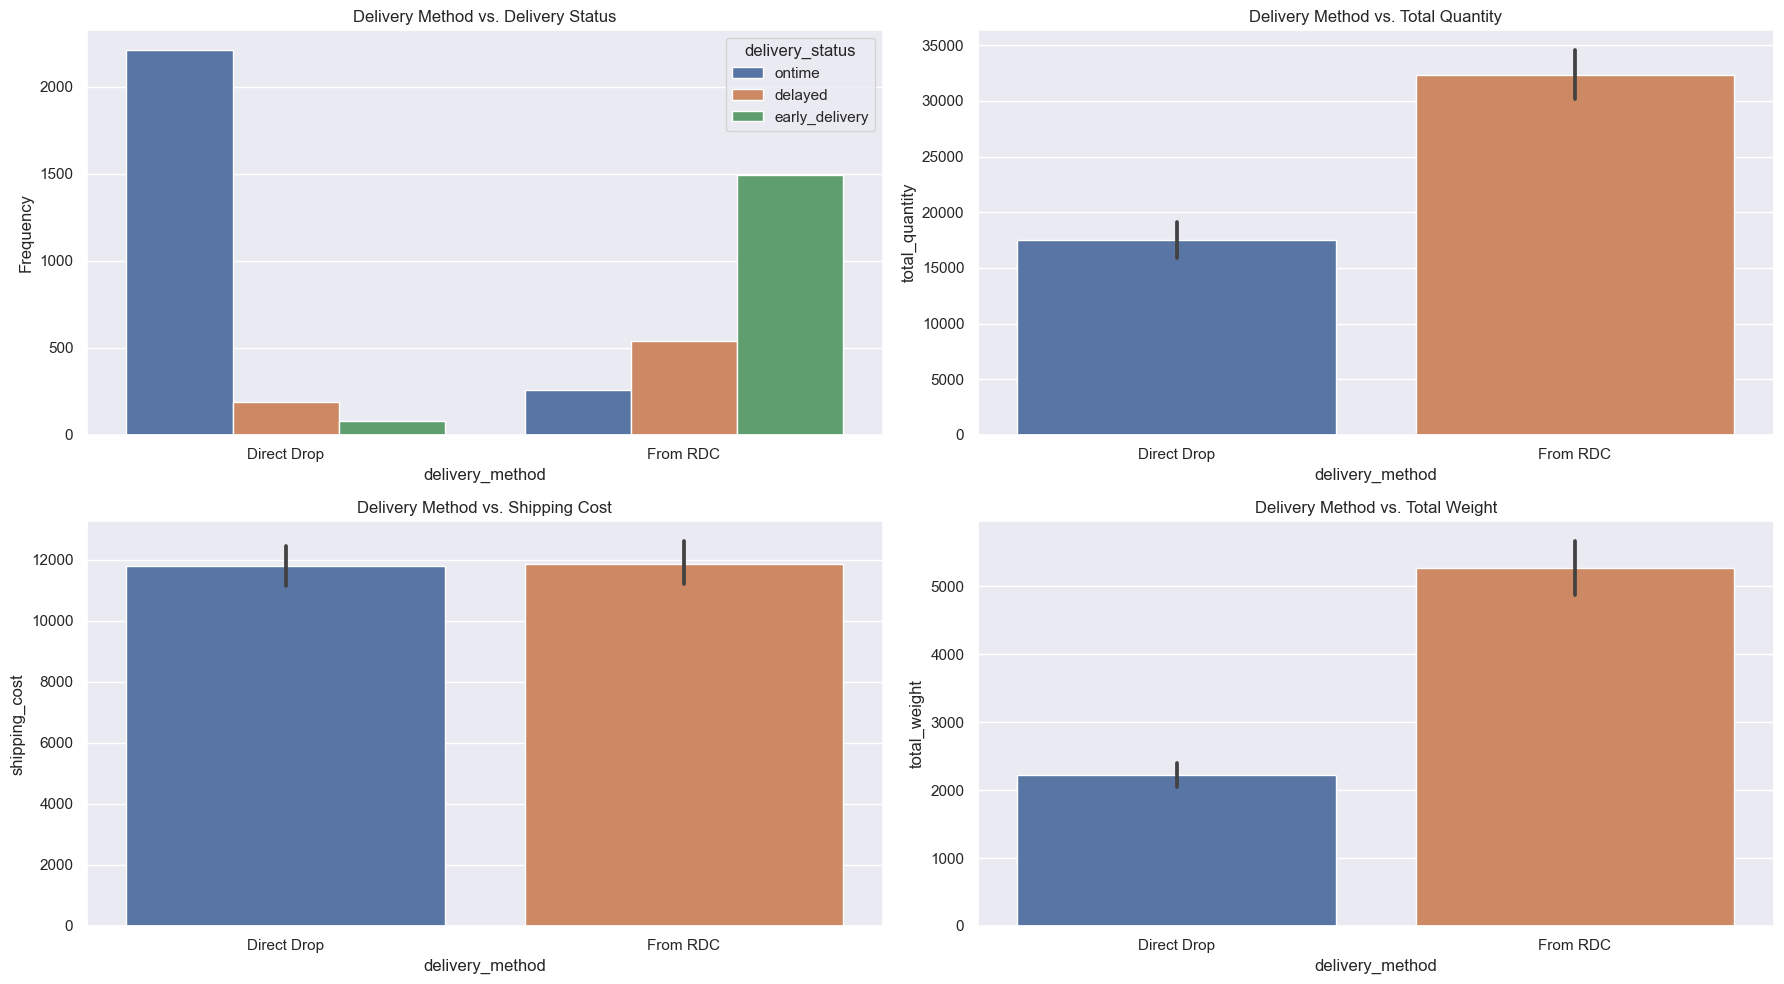

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Subplot 1: Delivery Method vs. Delivery Status
plt.subplot(2, 2, 1)
sns.countplot(x='delivery_method', hue='delivery_status', data=data)
plt.title('Delivery Method vs. Delivery Status')
plt.ylabel('Frequency')

# Subplot 2: Delivery Method vs. Total Quantity
plt.subplot(2, 2, 2)
sns.barplot(x='delivery_method', y='total_quantity', data=data)
plt.title('Delivery Method vs. Total Quantity')

# Subplot 3: Delivery Method vs. Shipping Cost
plt.subplot(2, 2, 3)
sns.barplot(x='delivery_method', y='shipping_cost', data=data)
plt.title('Delivery Method vs. Shipping Cost')

# Subplot 4: Delivery Method vs. Insurance Cost
plt.subplot(2, 2, 4)
sns.barplot(x='delivery_method', y='total_weight', data=data)
plt.title('Delivery Method vs. Total Weight')

# Adjust spacing between subplots
plt.tight_layout();

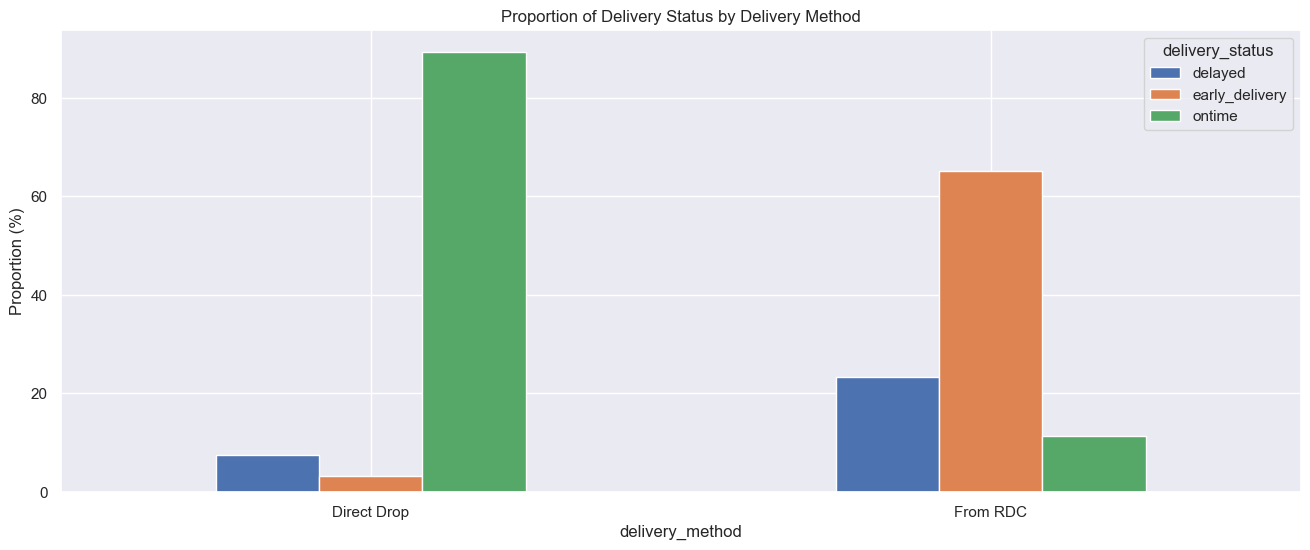

In [71]:
# Create a crosstab of counts
counts = pd.crosstab(data['delivery_method'], data['delivery_status'])

# Calculate proportions
proportions = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the proportions
proportions.plot(kind='bar', stacked=False)
plt.ylabel('Proportion (%)')
plt.title('Proportion of Delivery Status by Delivery Method')
plt.xticks(rotation=0);
plt.savefig("Delivery_Method_vs._Delivery_Status.png", dpi=150)

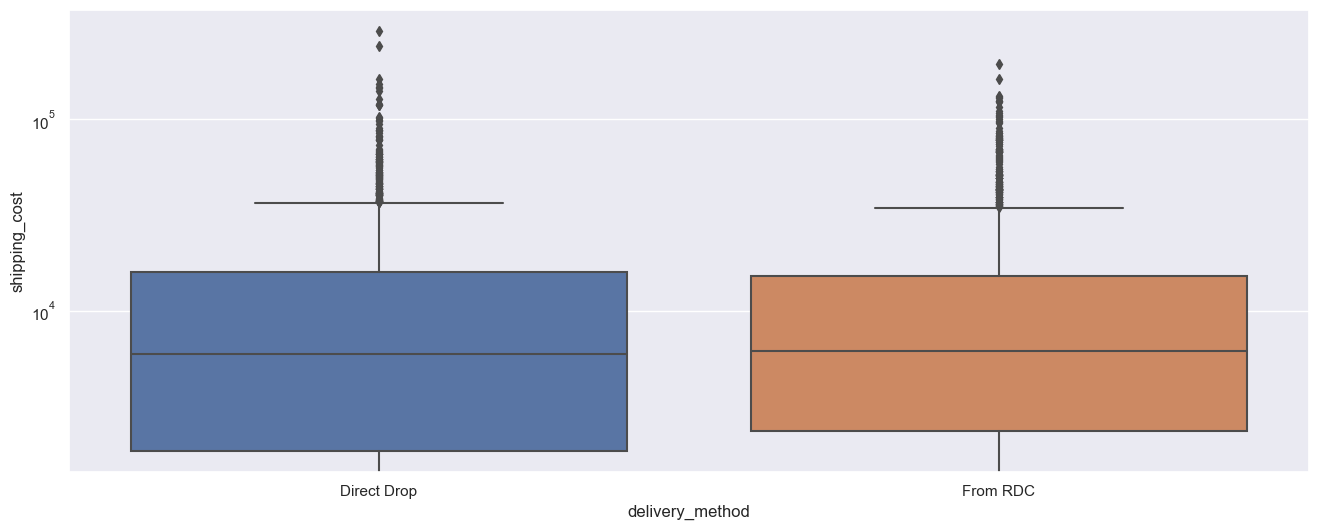

In [72]:
sns.boxplot(x='delivery_method', y='shipping_cost', data=data)
# plt.title('Delivery Method vs. Shipping Cost')
# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.savefig("Delivery_Method_versus_Shipping_Cost.png", dpi=150)

Checking whether the choice of delivery method affects order quanties, delivery status, shipping cost, and total weight and there's quite some observations to be made

#### Factory Location vs. Total quantities, Delivery status, Shipping cost, and Unit Price

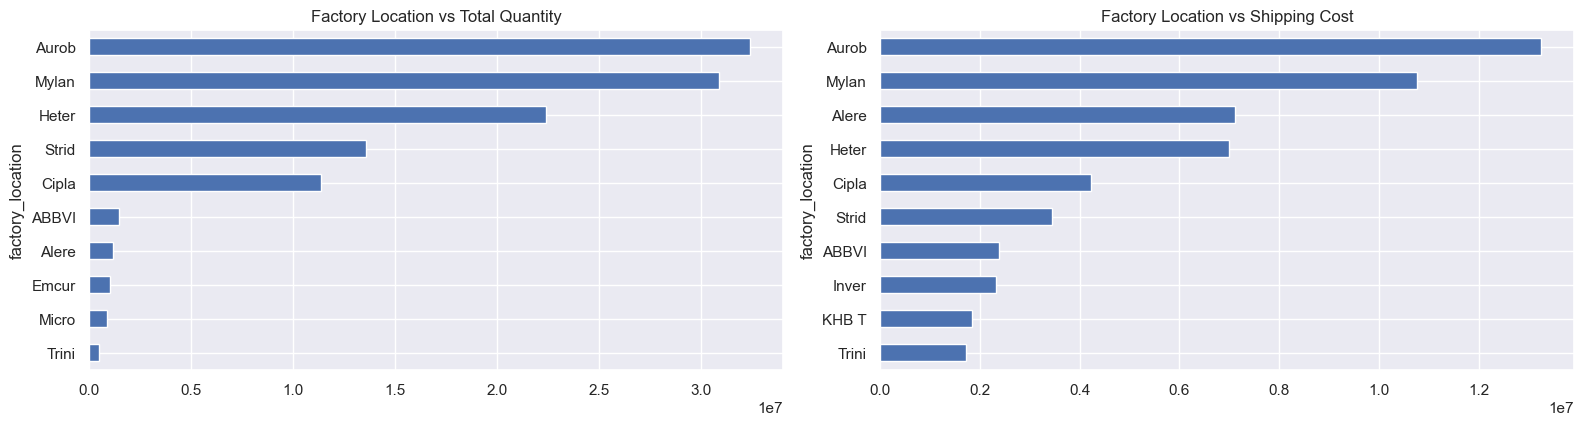

In [73]:
# Create subplots for each column
plt.subplot(2, 2, 1)
data.groupby(data['factory_location'].str[:5])['total_quantity'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(16,8), title="Factory Location vs Total Quantity")
plt.subplot(2, 2, 2)
data.groupby(data['factory_location'].str[:5])['shipping_cost'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(16,8), title='Factory Location vs Shipping Cost')
plt.tight_layout();

Does orders from certain factory locations affects the above features?

#### Country vs. Total quantities, and Shipping cost

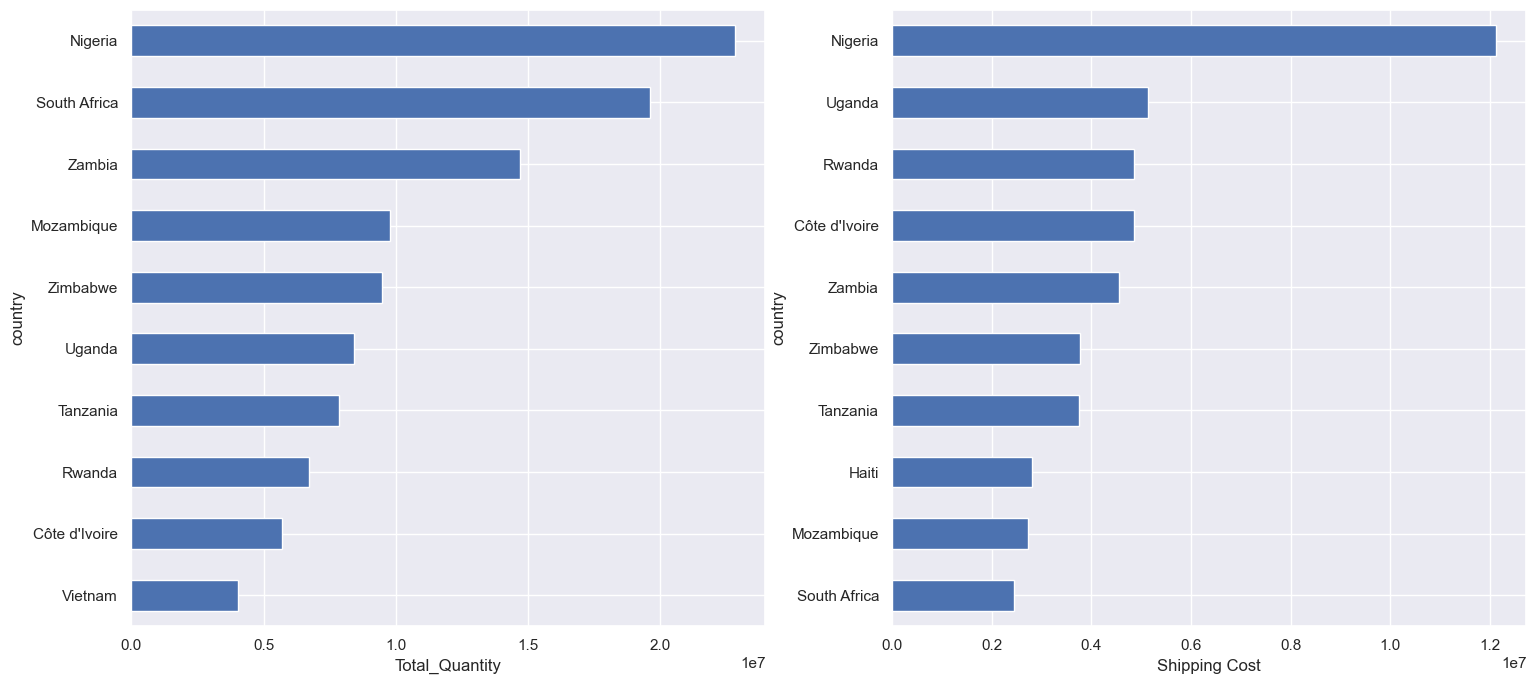

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
data.groupby(data['country'])['total_quantity'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(18,8), xlabel="Total_Quantity")
plt.subplot(1,2, 2)
data.groupby('country')['shipping_cost'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(18,8), xlabel="Shipping Cost");
plt.savefig("Country_versus_total_quantity_&_shipping_cost.png", dpi=150)

In [75]:
data['item_quantity(%)'] = round((data['total_quantity']/data['total_quantity'].sum()) *100,2)
data.groupby('country')[['total_value', 'shipping_cost', 'total_quantity', 'item_quantity(%)']].sum().sort_values(by='total_quantity', ascending=False)

total_value  shipping_cost  total_quantity  \
country                                                           
Nigeria             2.368288e+08    12130144.28        22841840   
South Africa        8.685259e+07     2448839.39        19612427   
Zambia              1.262435e+08     4559842.28        14684690   
Mozambique          9.833784e+07     2729342.69         9798661   
Zimbabwe            5.998806e+07     3768056.36         9462695   
Uganda              6.918014e+07     5136085.08         8437360   
Tanzania            7.819466e+07     3753645.97         7866443   
Rwanda              5.033402e+07     4865102.77         6711064   
Côte d'Ivoire       6.495703e+07     4848560.86         5687856   
Vietnam             3.535964e+07     1900765.63         4042848   
Haiti               2.161991e+07     2800028.58         2465405   
Cameroon            1.234366e+07     1783455.29         1379963   
Ghana               5.546729e+06      552828.98         1112728   
Ethiopia            6.162179e+06      822003.28          687008   
Malawi              5.854456e+06      100420.13          501640   
Swaziland           5.618971e+06      184695.88          471283   
Namibia             3.571151e+06      332757.18          418612   
Kenya               2.682669e+07     1313076.84          405032   
Congo, DRC          2.777867e+06      698560.49          182601   
Botswana            1.304211e+06      104173.41          112435   
Benin               5.454805e+05       58191.29          103654   
Guyana              2.296356e+06      372421.14          102590   
Burundi             2.277174e+06      312042.32           89240   
Dominican Republic  1.558134e+06      245864.58           67950   
South Sudan         6.998661e+05      249818.76           55463   
Pakistan            1.434880e+06      103370.89           17936   
Libya               1.128535e+05        8361.17           14233   
Togo                1.532580e+05       12544.72           13042   
Guatemala           1.593092e+05       38494.98            6744   
Sierra Leone        3.200000e+05       28703.53            4000   
Sudan               2.293064e+05       63334.97            3861   
Angola              1.816000e+05       30832.07            3620   
Lesotho             1.683200e+05       11063.78            2104   
Mali                1.436500e+05       27663.90            1673   
Liberia             1.028400e+05       19950.85            1455   
Senegal             1.864000e+03         632.63             100   
Afghanistan         1.736000e+03        1081.05              58   
Guinea              3.600000e+03        1804.20              50   

                    item_quantity(%)  
country                               
Nigeria                        19.33  
South Africa                   16.76  
Zambia                         12.49  
Mozambique                      8.14  
Zimbabwe                        8.01  
Uganda                          6.92  
Tanzania                        6.60  
Rwanda                          5.53  
Côte d'Ivoire                   4.49  
Vietnam                         3.40  
Haiti                           1.86  
Cameroon                        1.16  
Ghana                           0.91  
Ethiopia                        0.54  
Malawi                          0.43  
Swaziland                       0.41  
Namibia                         0.34  
Kenya                           0.42  
Congo, DRC                      0.12  
Botswana                        0.09  
Benin                           0.08  
Guyana                          0.00  
Burundi                         0.04  
Dominican Republic              0.03  
South Sudan                     0.03  
Pakistan                        0.00  
Libya                           0.01  
Togo                            0.02  
Guatemala                       0.00  
Sierra Leone                    0.00  
Sudan                           0.00  
Angola                          0.00  
Lesotho       

## Multivariate Analysis

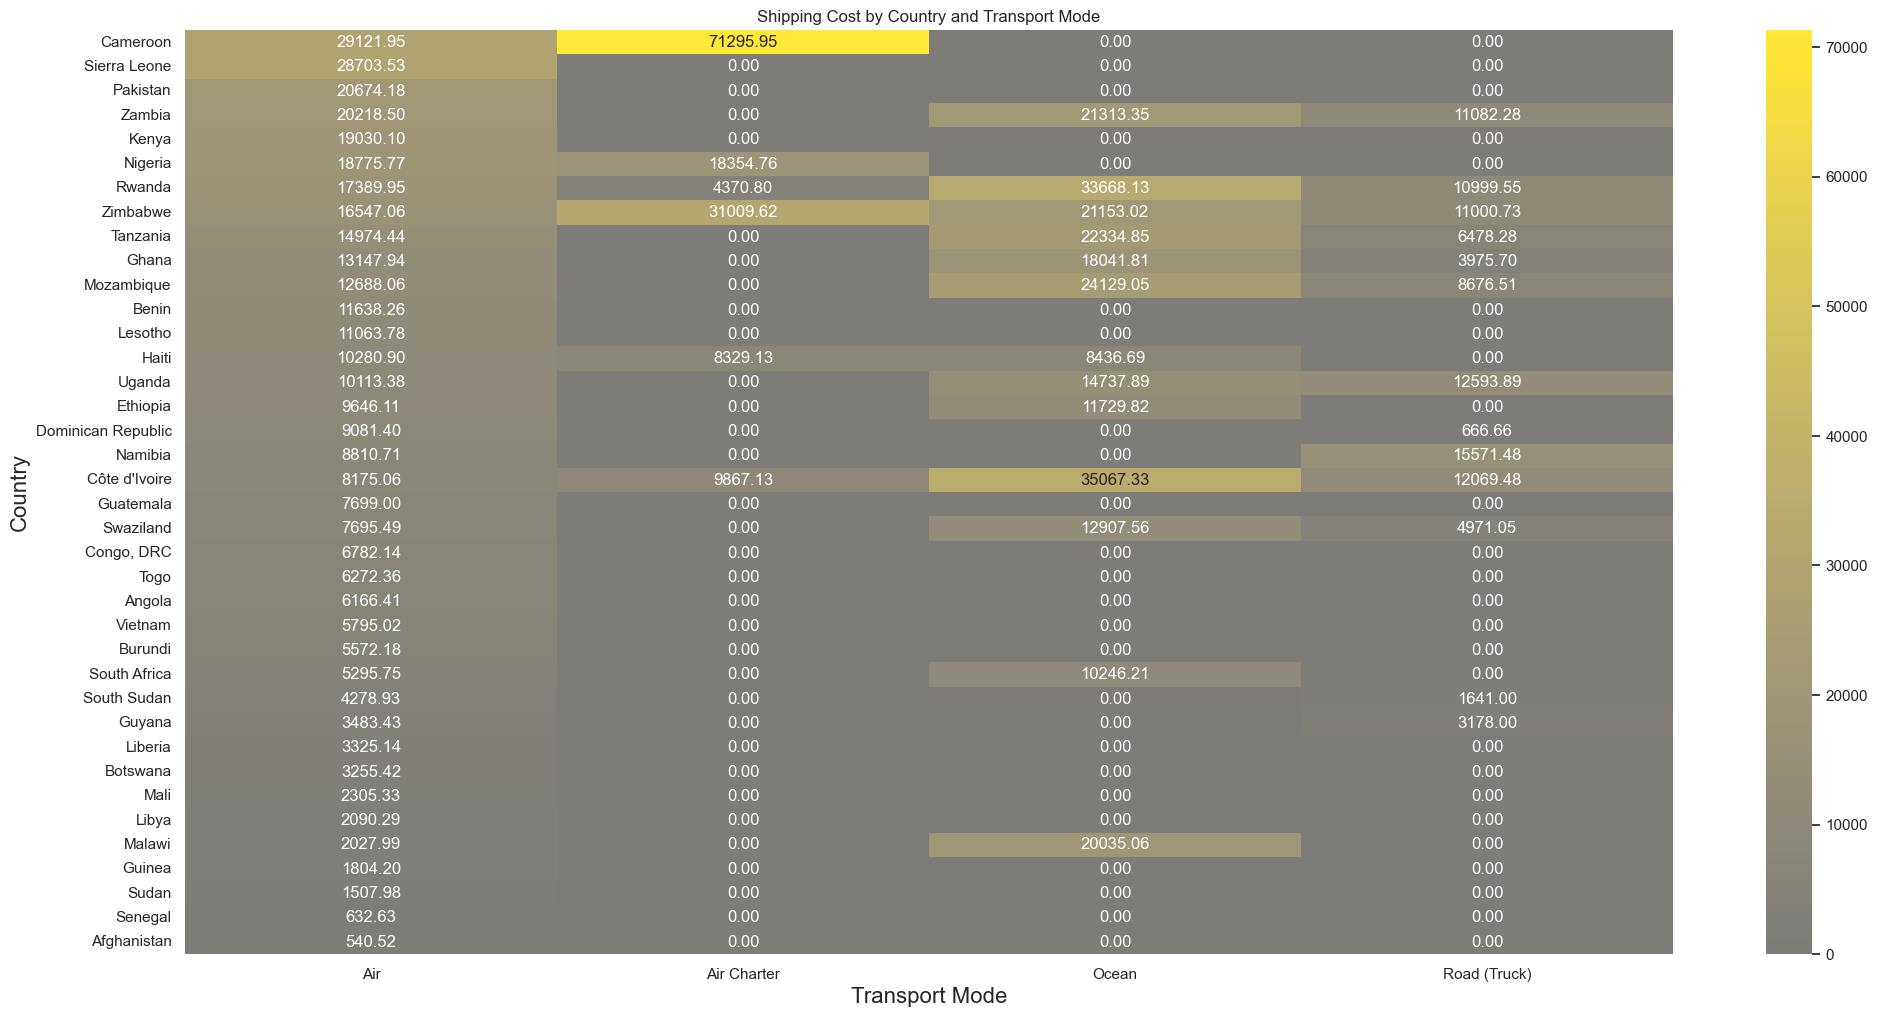

In [76]:
# Subset the qunatity of commodities  by the country and product category
interaction = data.pivot_table(index='country', columns='transport_mode', values='shipping_cost', aggfunc='mean', fill_value=0).sort_values(by='Air', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(interaction, center=0, annot=True, cmap='cividis', fmt='.2f')
plt.title('Shipping Cost by Country and Transport Mode')
plt.xlabel('Transport Mode', fontsize=16)
plt.ylabel('Country', fontsize=16);
plt.savefig("Shipping_Cost_by_Transport_Mode_&_Country.png", dpi=150)

In [77]:
interaction.sort_values(by='Air')

transport_mode               Air   Air Charter         Ocean  Road (Truck)
country                                                                   
Afghanistan           540.525000      0.000000      0.000000      0.000000
Senegal               632.630000      0.000000      0.000000      0.000000
Sudan                1507.975476      0.000000      0.000000      0.000000
Guinea               1804.200000      0.000000      0.000000      0.000000
Malawi               2027.991000      0.000000  20035.055000      0.000000
Libya                2090.292500      0.000000      0.000000      0.000000
Mali                 2305.325000      0.000000      0.000000      0.000000
Botswana             3255.419063      0.000000      0.000000      0.000000
Liberia              3325.141667      0.000000      0.000000      0.000000
Guyana               3483.425849      0.000000      0.000000   3178.000000
South Sudan          4278.926897      0.000000      0.000000   1641.000000
South Africa         5295.746742      0.000000  10246.206891      0.000000
Burundi              5572.184286      0.000000      0.000000      0.000000
Vietnam              5795.017165      0.000000      0.000000      0.000000
Angola               6166.414000      0.000000      0.000000      0.000000
Togo                 6272.360000      0.000000      0.000000      0.000000
Congo, DRC           6782.140680      0.000000      0.000000      0.000000
Swaziland            7695.485500      0.000000  12907.560000   4971.050000
Guatemala            7698.996000      0.000000      0.000000      0.000000
Côte d'Ivoire        8175.056967   9867.133333  35067.333333  12069.475697
Namibia              8810.713889      0.000000      0.000000  15571.480000
Dominican Republic   9081.404444      0.000000      0.000000    666.660000
Ethiopia             9646.112619      0.000000  11729.820000      0.000000
Uganda              10113.380906      0.000000  14737.890000  12593.887862
Haiti               10280.902934   8329.130000   8436.692778      0.000000
Lesotho             11063.780000      0.000000      0.000000      0.000000
Benin               11638.258000      0.000000      0.000000      0.000000
Mozambique          12688.055287      0.000000  24129.053333   8676.506816
Ghana               13147.940256      0.000000  18041.805000   3975.700000
Tanzania            14974.440737      0.000000  22334.848000   6478.276341
Zimbabwe            16547.061975  31009.624706  21153.023333  11000.728443
Rwanda              17389.947653   4370.800000  33668.125789  10999.547447
Nigeria             18775.767070  18354.756667      0.000000      0.000000
Kenya               19030.099130      0.000000      0.000000      0.000000
Zambia              20218.502091      0.000000  21313.353333  11082.278000
Pakistan            20674.178000      0.000000      0.000000      0.000000
Sierra Leone        28703.530000      0.000000      0.000000      0.000000
Cameroon            29121.950204  71295.946000      0.000000      0.000000

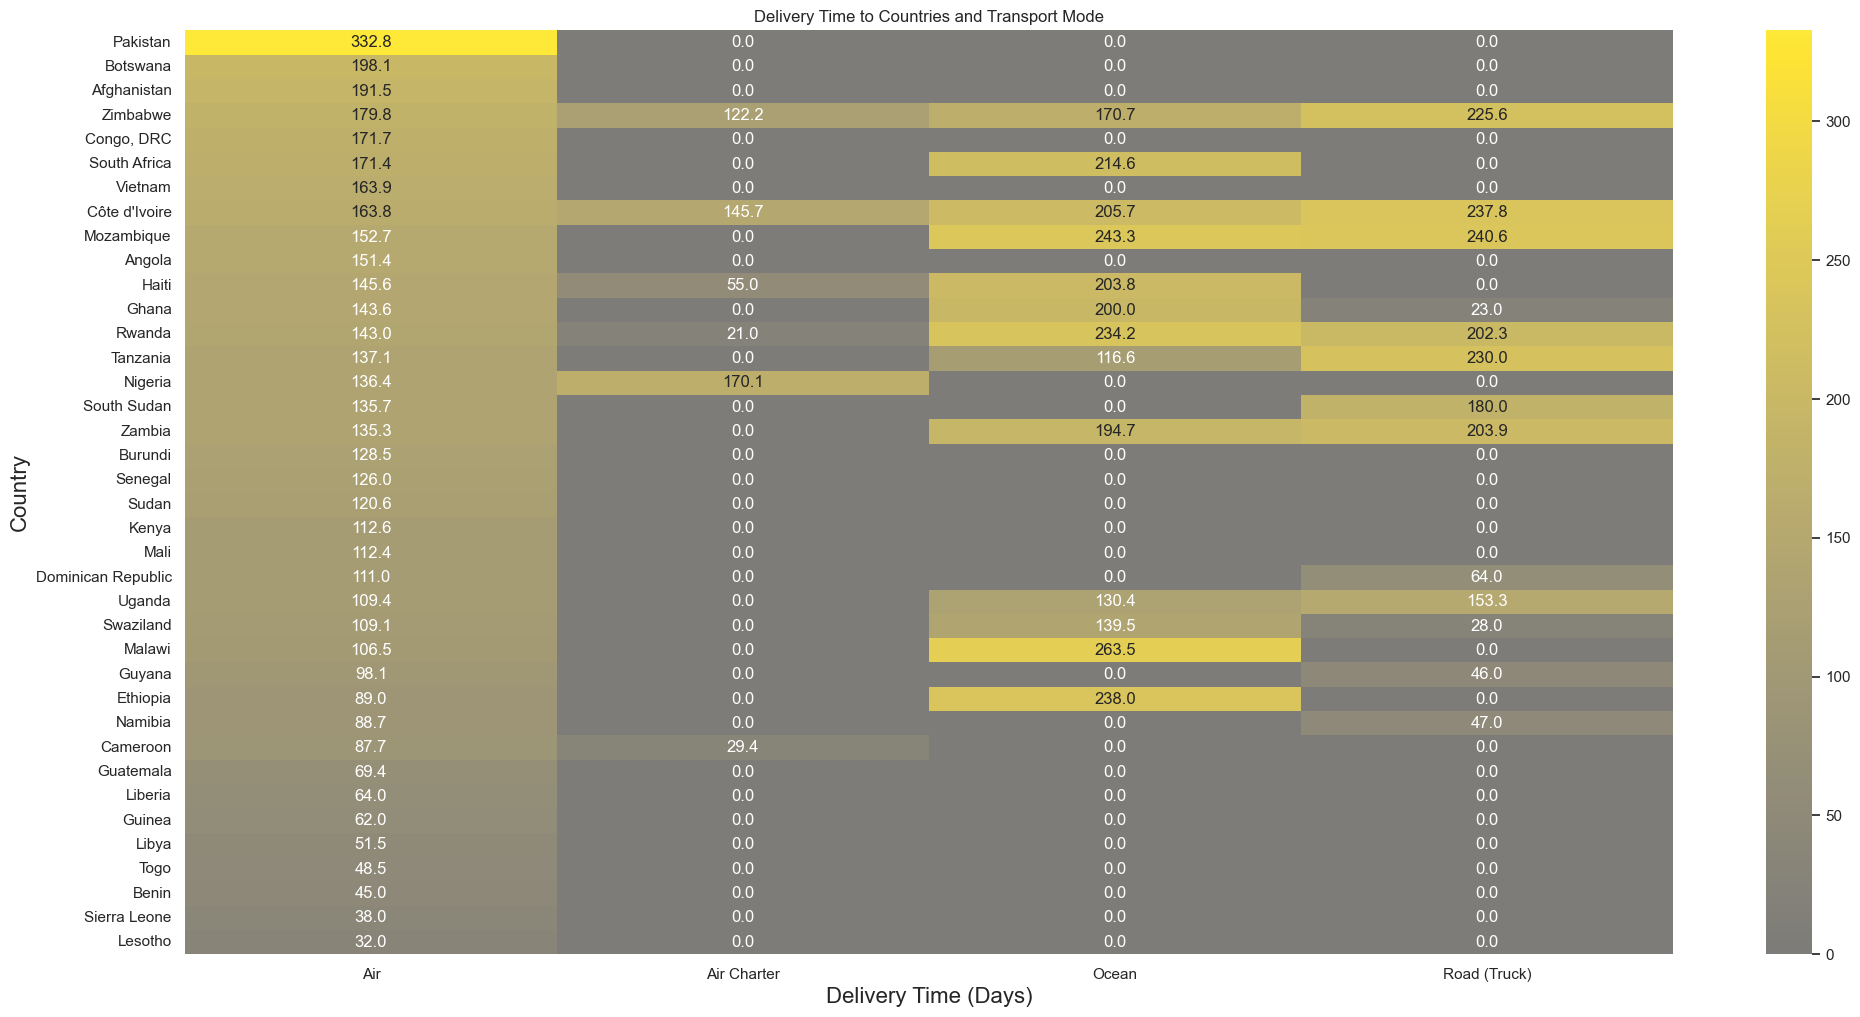

In [78]:
# Subset the qunatity of commodities  by the country and product category
interaction2 = data.pivot_table(index='country', columns='transport_mode', values='order_to_delivery_days', aggfunc='mean', fill_value=0).sort_values(by='Air', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(interaction2, center=0, annot=True, cmap='cividis', fmt='.1f')
plt.title('Delivery Time to Countries and Transport Mode')
plt.xlabel('Delivery Time (Days)', fontsize=16)
plt.ylabel('Country', fontsize=16);
plt.savefig("Delivery_Time_Transport_Mode_&_Country.png", dpi=150)

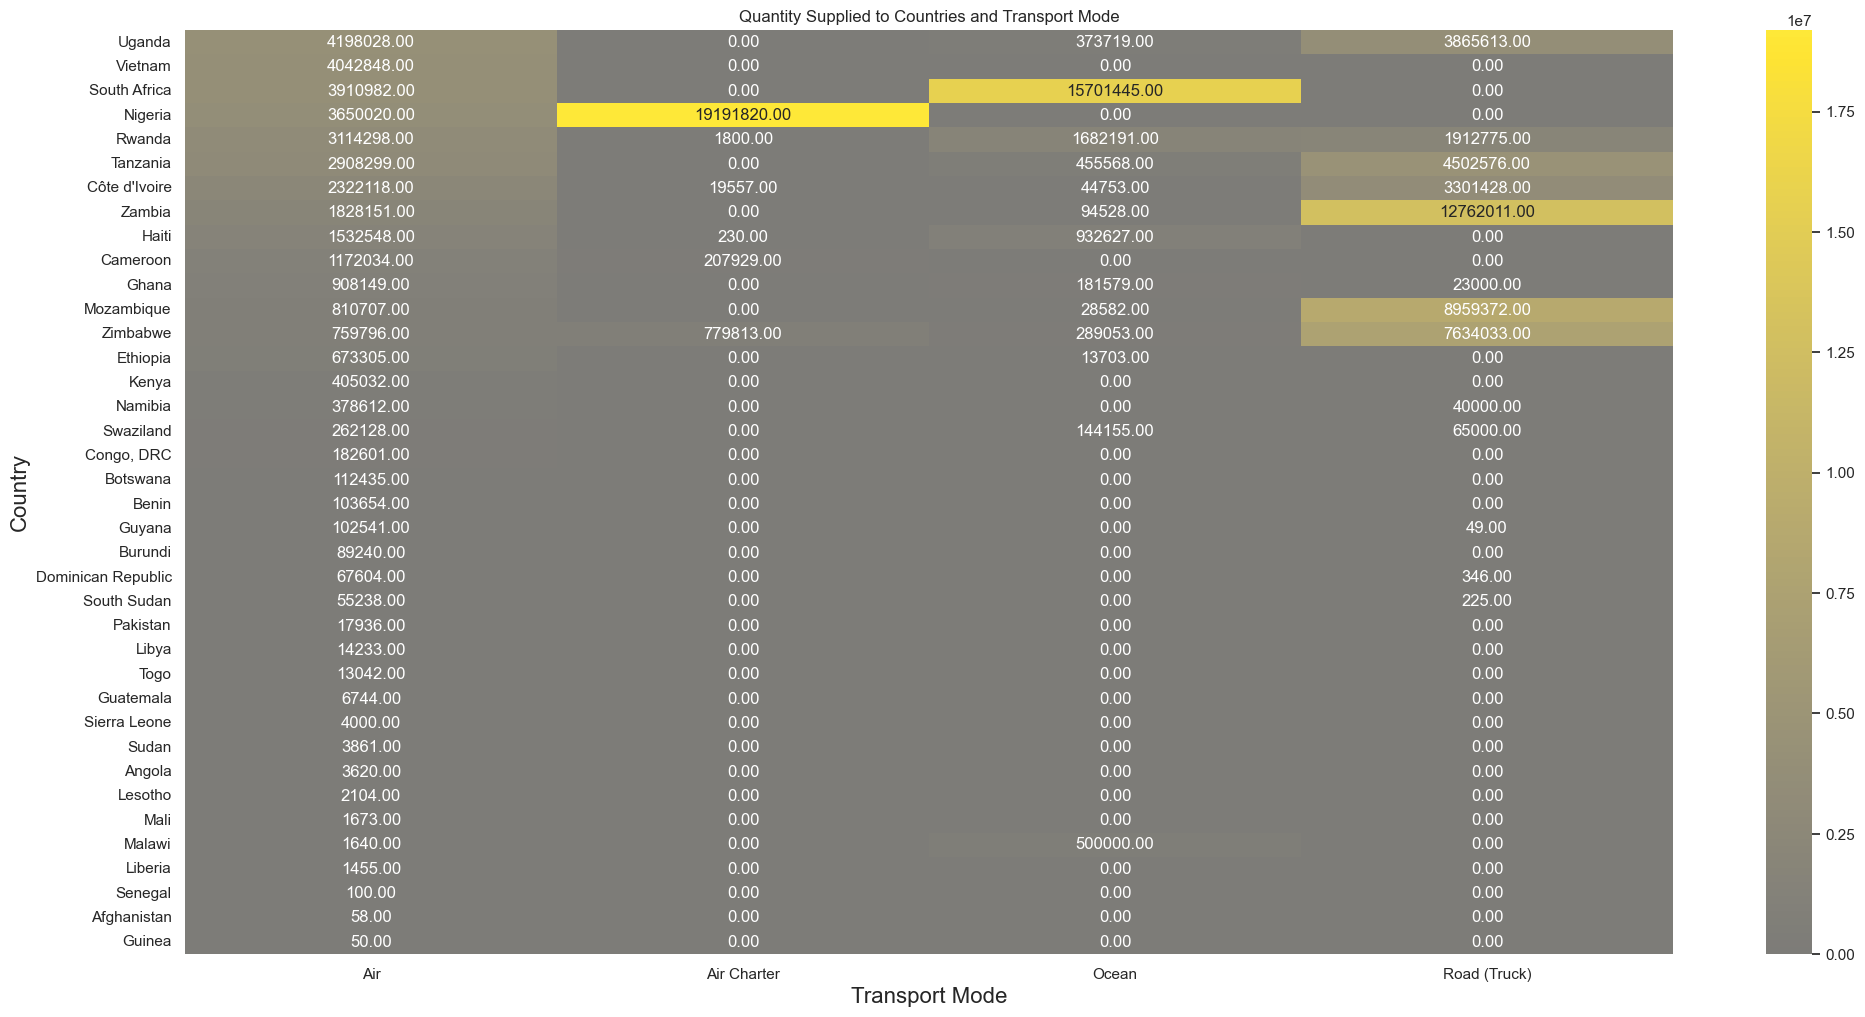

In [79]:
# Subset the qunatity of commodities  by the country and transport mode
interaction3 = data.pivot_table(index='country', columns='transport_mode', values='total_quantity', aggfunc='sum', fill_value=0).sort_values(by='Air', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(interaction3, center=0, annot=True, cmap='cividis', fmt='.2f')
plt.title('Quantity Supplied to Countries and Transport Mode')
plt.xlabel('Transport Mode', fontsize=16)
plt.ylabel('Country', fontsize=16);
plt.savefig("Quantity_by_Transport_Mode_&_Country.png", dpi=150)

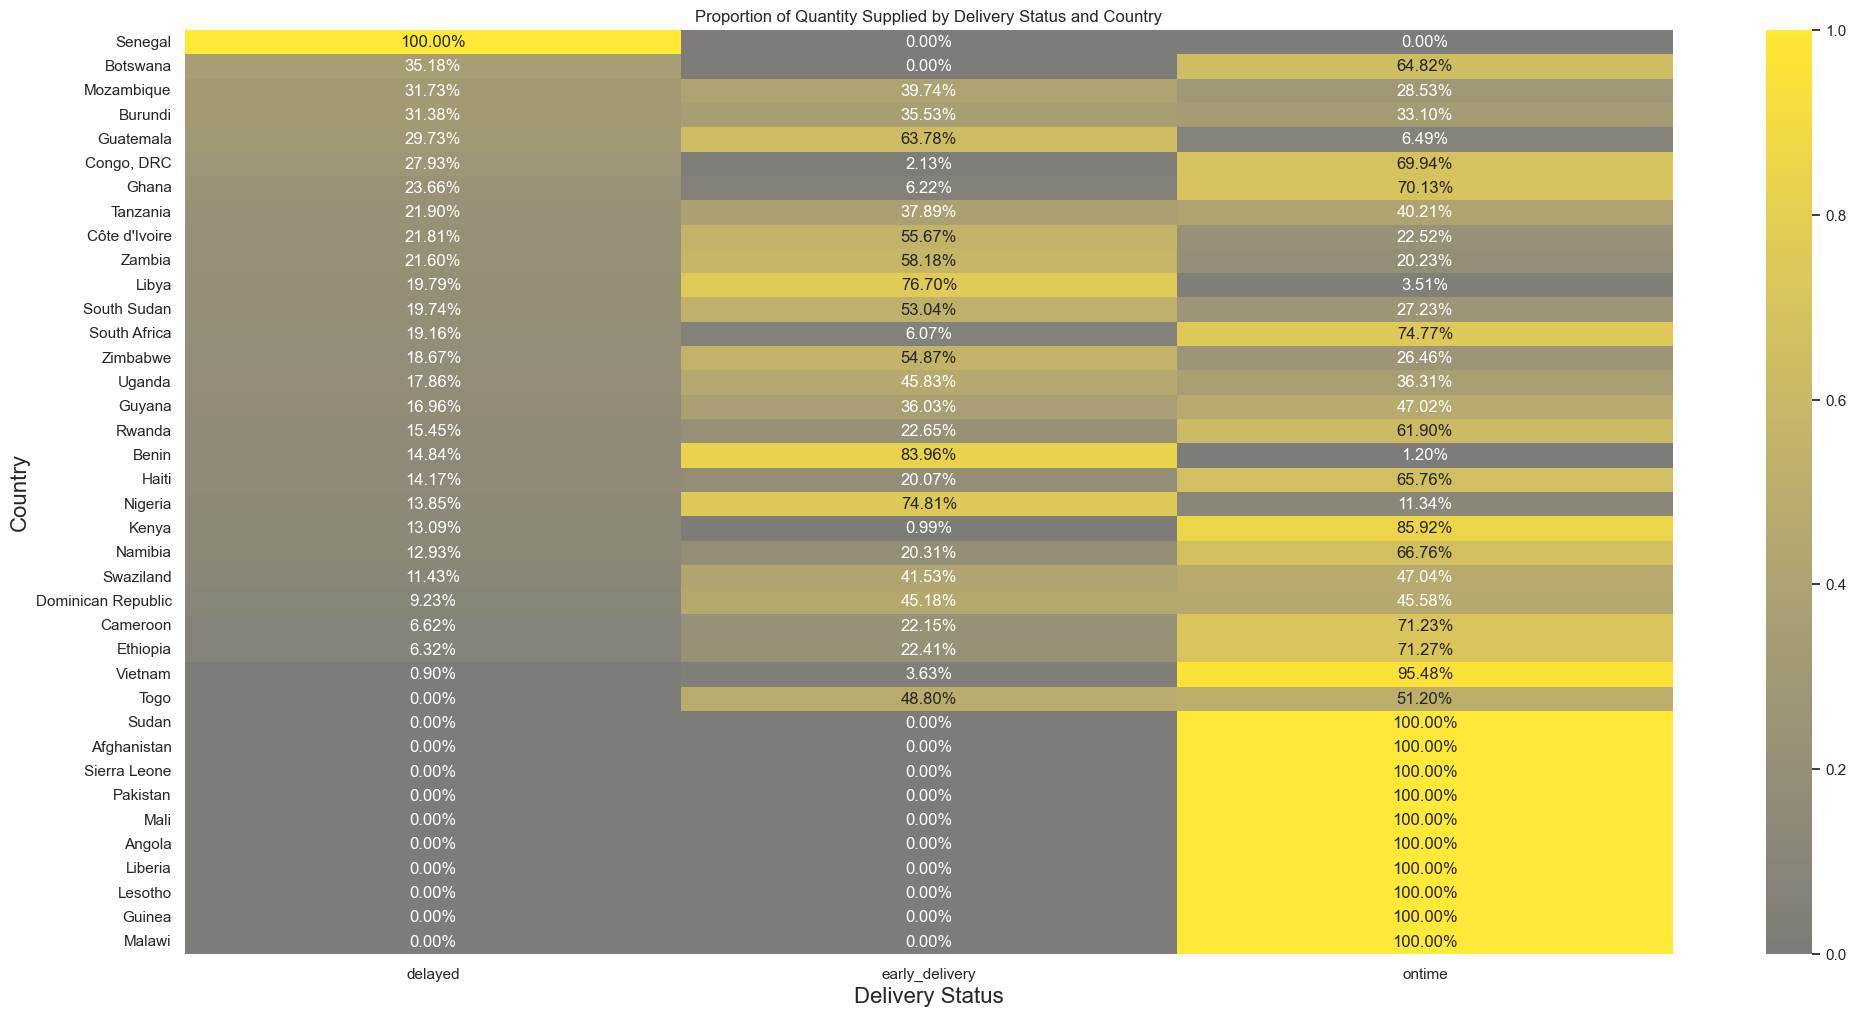

In [80]:
# Calculate the sum for each combination of country and delivery status
total_quantities = data.pivot_table(index='country', columns='delivery_status', values='total_quantity', aggfunc='sum', fill_value=0)

# Calculate the total quantity for each country
total_by_country = total_quantities.sum(axis=1)

# Calculate the proportion of each delivery status
proportions = total_quantities.divide(total_by_country, axis=0).sort_values(by='delayed', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(proportions, center=0, annot=True, cmap='cividis', fmt='.2%')  # Use percentage format
plt.title('Proportion of Quantity Supplied by Delivery Status and Country')
plt.xlabel('Delivery Status', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.savefig("Proportion_by_Delivery_Status_&_Country.png", dpi=150)

In [81]:
data.groupby('transport_mode')[['total_quantity', 'shipping_cost', 'order_to_delivery_days']].mean()

total_quantity  shipping_cost  order_to_delivery_days
transport_mode                                                       
Air               11109.202640   11148.694521              139.513861
Air Charter       47420.537559   19365.006080              165.758216
Ocean             73268.469534   12777.971362              210.939068
Road (Truck)      41529.824494   10437.291418              214.254581

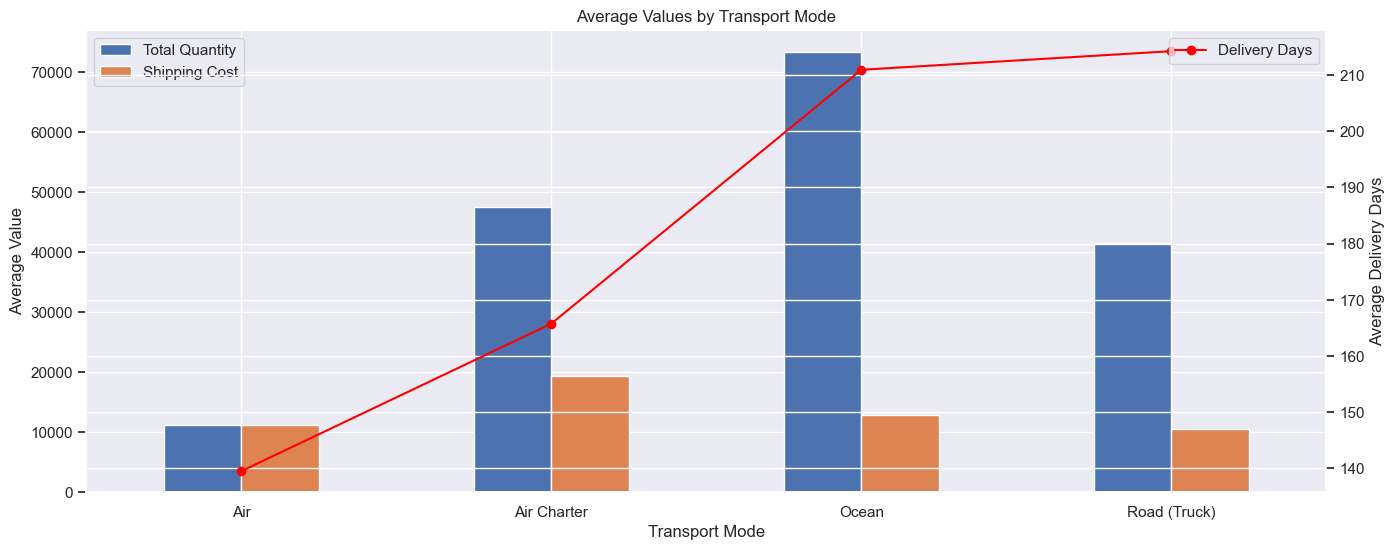

In [82]:
# Grouped bar chart
grouped_data = data.groupby('transport_mode')[['total_quantity', 'shipping_cost', 'order_to_delivery_days']].mean()

fig, ax1 = plt.subplots()

# Bar plot for total_quantity and shipping_cost
grouped_data[['total_quantity', 'shipping_cost']].plot(kind='bar', ax=ax1)
ax1.set_title('Average Values by Transport Mode')
ax1.set_xlabel('Transport Mode')
ax1.set_ylabel('Average Value')
ax1.set_xticklabels(grouped_data.index, rotation=0)
ax1.legend(['Total Quantity', 'Shipping Cost'], loc='upper left')

# Secondary axis for delivery_days using a line plot
ax2 = ax1.twinx()
grouped_data['order_to_delivery_days'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Delivery Days')
ax2.legend(['Delivery Days'], loc='upper right');

plt.savefig("Average_Values_with_Delivery_Days.png", dpi=150)

In [83]:
# Groupping ontime and early delivry as early_delivery
data['delivery_status'] = data['delivery_status'].replace({'ontime': 'early_delivery'})

In [84]:
cleaned_supply_chain_data = data.to_csv("cleaned_supply_chain_data.csv")